<a href="https://colab.research.google.com/github/victoriapaganotto/programacaoempython_UFPB/blob/main/GoodMorningSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Biblioteca *Seaborn***

![](https://i1.wp.com/ocean-climate.org/wp-content/uploads/2017/09/wsi-imageoptim-ocean-gif.gif?ssl=1)

Você já ouviu falar nela? 
Trata-se de uma biblioteca de vizualização de dados baseada em *matplotlib* que se integra às estruturas de dados do *pandas*. A partir dela é possível elaborar gráficos estatísticos e informativos.

Com o mesmo é possível gerar cerca de 48 gráficos, entretanto, apresentaremos apenas os mais usuais, ou, que sejam de uso dos pesquisadores que estão cursando a disciplina de Programação em *Python*, do Programa de Pós-Graduação em Engenharia Civil e Ambiental da Universidade Federal da Paraíba (UFPB).

Para a exemplificação dos produtos, será utilizado um *dataset* presente na plataforma *kaggle*. O mesmo diz respeito a qualidade da água das praias de São Paulo, no Brasil, e apresenta mais de 68.000 medições de *Enterococcus* realizadas semanalmente entre os anos de 2012 a 2020 em 168 praias, que que localizam em 16 cidades.

O *dataset* apresenta quatro colunas, que possuem as seguintes informações:

* Nome do município onde a amostra foi coletada;
* Nome da praia ou do ponto de coleta;
* Data de medição;
* Densidade de *Enterococcus* (CFU/ 100ml).





### **Análise dos dados presentes no *dataset***

Inicialmente será realizada a importação das bibliotecas utilizadas para as análises propostas, após, é necessário, que seja realizada a importação do *dataset*, como o mesmo está presente em uma pasta no ***GitHub***, o repositório estará presente na plataforma.

In [ ]:
# Importação das bibliotecas utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importação e visualização do repositório
beachlist = pd.read_csv('https://raw.githubusercontent.com/victoriapaganotto/programacaoempython_UFPB/main/sp_beaches.csv')
beachlist.head()

,City,Beach,Date,Enterococcus
0,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-03,8.0
1,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-08,22.0
2,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-15,17.0
3,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-22,8.0
4,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-29,2.0


In [ ]:
# Retirada dos dados relativos ao mês e dia na coluna "Date", para a realização dos gráficos
# Criação da coluna "Year" com informações somente do ano

beachlist['Date'] = pd.to_datetime(beachlist['Date'], format = '%Y-%m-%d')
beachlist['Year'] = beachlist['Date'].dt.year

print(beachlist)

           City                    Beach       Date  Enterococcus  Year
0      BERTIOGA  BORACÉIA - COL. MARISTA 2012-01-03           8.0  2012
1      BERTIOGA  BORACÉIA - COL. MARISTA 2012-01-08          22.0  2012
2      BERTIOGA  BORACÉIA - COL. MARISTA 2012-01-15          17.0  2012
3      BERTIOGA  BORACÉIA - COL. MARISTA 2012-01-22           8.0  2012
4      BERTIOGA  BORACÉIA - COL. MARISTA 2012-01-29           2.0  2012
...         ...                      ...        ...           ...   ...
70272   UBATUBA        VERMELHA DO NORTE 2020-11-30           1.0  2020
70273   UBATUBA        VERMELHA DO NORTE 2020-12-07          39.0  2020
70274   UBATUBA        VERMELHA DO NORTE 2020-12-14           1.0  2020
70275   UBATUBA        VERMELHA DO NORTE 2020-12-21          14.0  2020
70276   UBATUBA        VERMELHA DO NORTE 2020-12-28           1.0  2020

[70277 rows x 5 columns]


In [ ]:
# Exclusão da coluba "Date"
del beachlist['Date']

In [ ]:
# Tabela sem a presença da coluna "Date" e com a inserção da coluna "Year", somente com informações relativas ao ano
beachlist.head()

,City,Beach,Enterococcus,Year
0,BERTIOGA,BORACÉIA - COL. MARISTA,8.0,2012
1,BERTIOGA,BORACÉIA - COL. MARISTA,22.0,2012
2,BERTIOGA,BORACÉIA - COL. MARISTA,17.0,2012
3,BERTIOGA,BORACÉIA - COL. MARISTA,8.0,2012
4,BERTIOGA,BORACÉIA - COL. MARISTA,2.0,2012


In [ ]:
# Quantidade de dados presentes no dataset
beachlist.shape
len(beachlist)

70277

O primeiro gráfico elaborado diz respeito a quantidade de municípios presente no repositório, assim como, a quantidade de citações que os mesmos apresentam, que diz respeito ao número de coletas realizado.

Conforme visualiza-se o município de São Sebastião é o que mais se repete na lista, seguido de Ubatuba e Ilhabela.

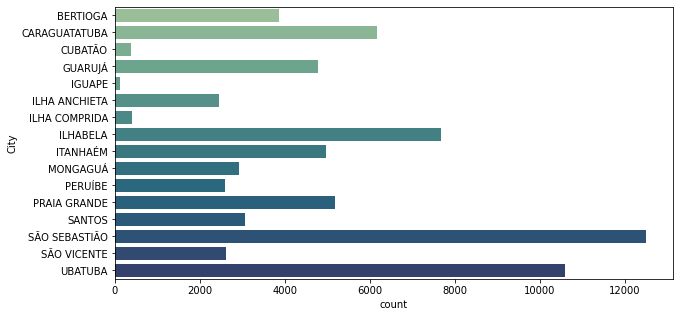

In [ ]:
# Elaboração do countplot
# Quantos municípios são mencionados?
# Quantas vezes? 
plt.figure(figsize = (10,5))
sns.countplot(data = beachlist, y = 'City', palette = 'crest' )

plt.show()

O próximo gráfico, diz respeito ao número de repetição de praias presentes no repositório. O destaque é a praia Grande e a Prainha.

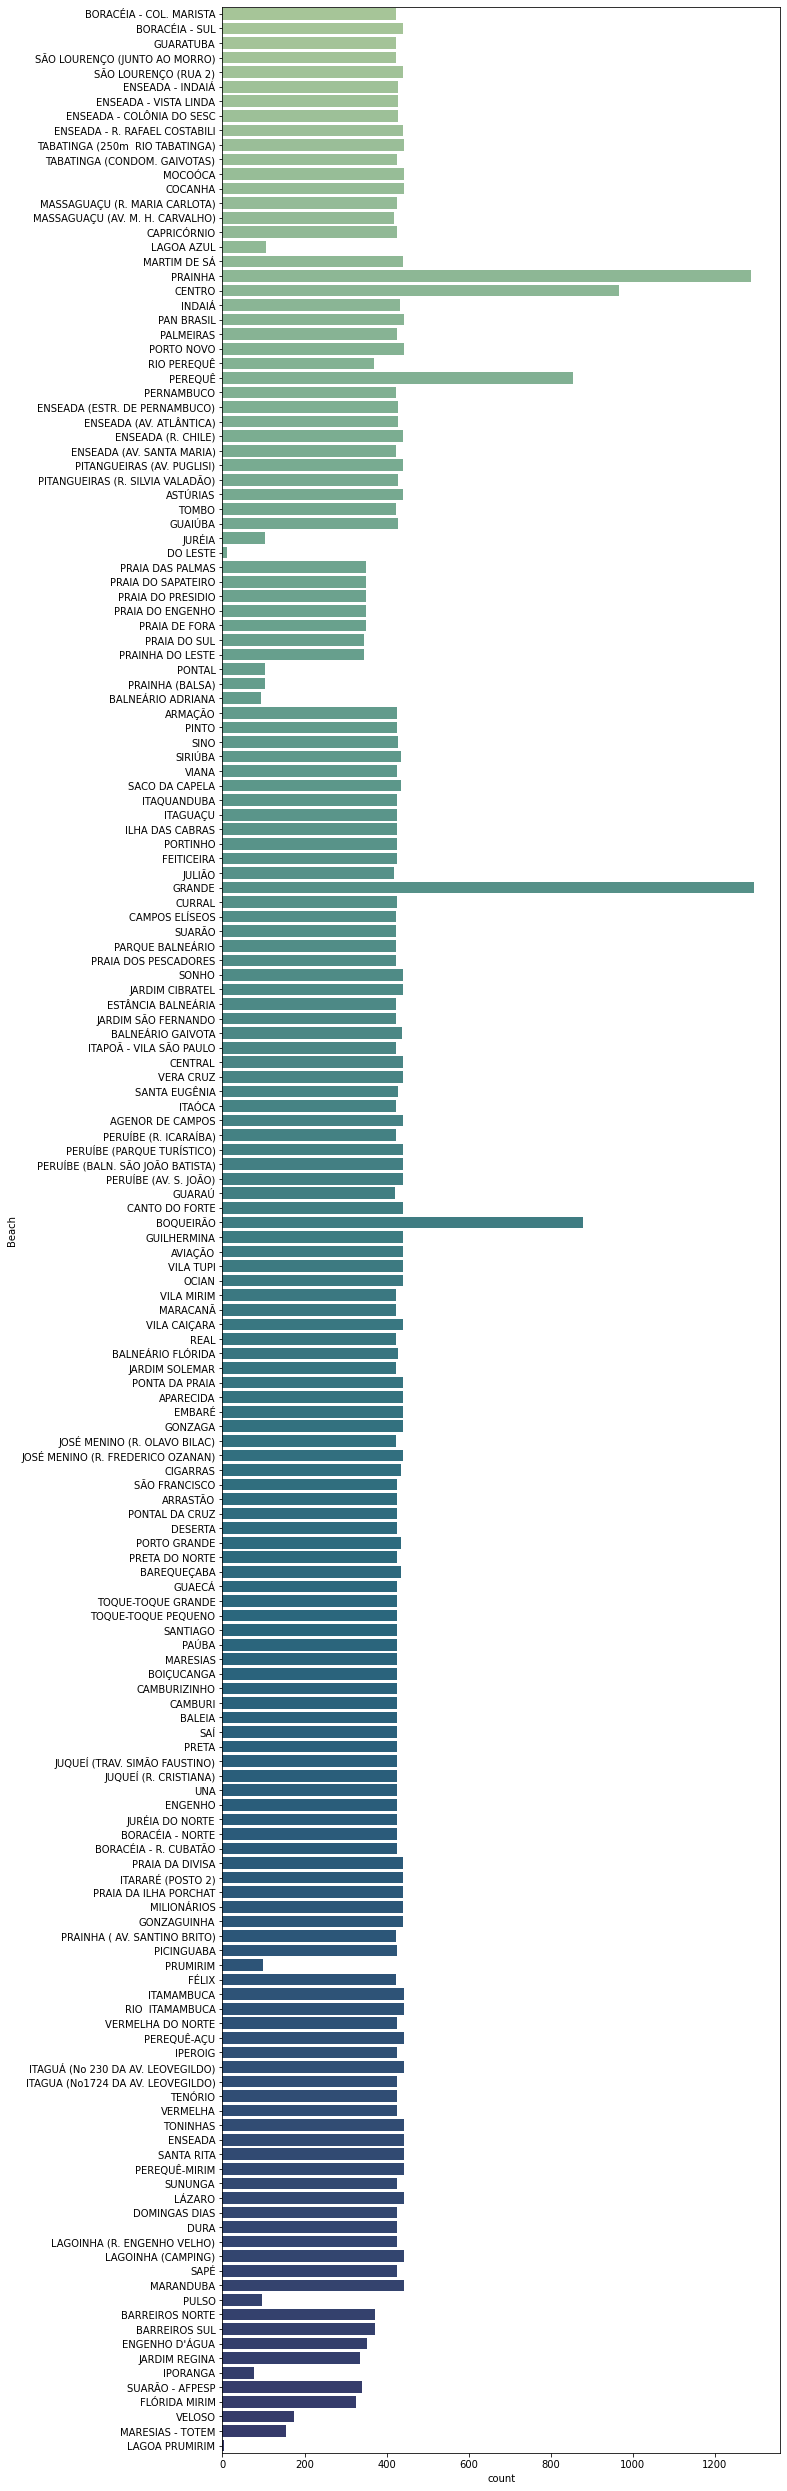

In [ ]:
# Elaboração do countplot
# Quando se trata de praias ou pontos de coleta, quantos foram mencionados? 
# E a quantidade de citações?
plt.figure(figsize = (10,45))
sns.countplot(data = beachlist, y = 'Beach', palette = 'crest')

plt.show()

**Realização da relação entre os municípios citados anteriormente e a presença de *Enterococcus* na água do mar de suas respectivas praias.**

Percebe-se a partir do gráfico a baixo que o único município que possui coletas acima de 5000 CFU/ 100ml é São Vicente.


Seguido de Guarujá, Praia Grande e Ilhabela que apresentam valores significativos.

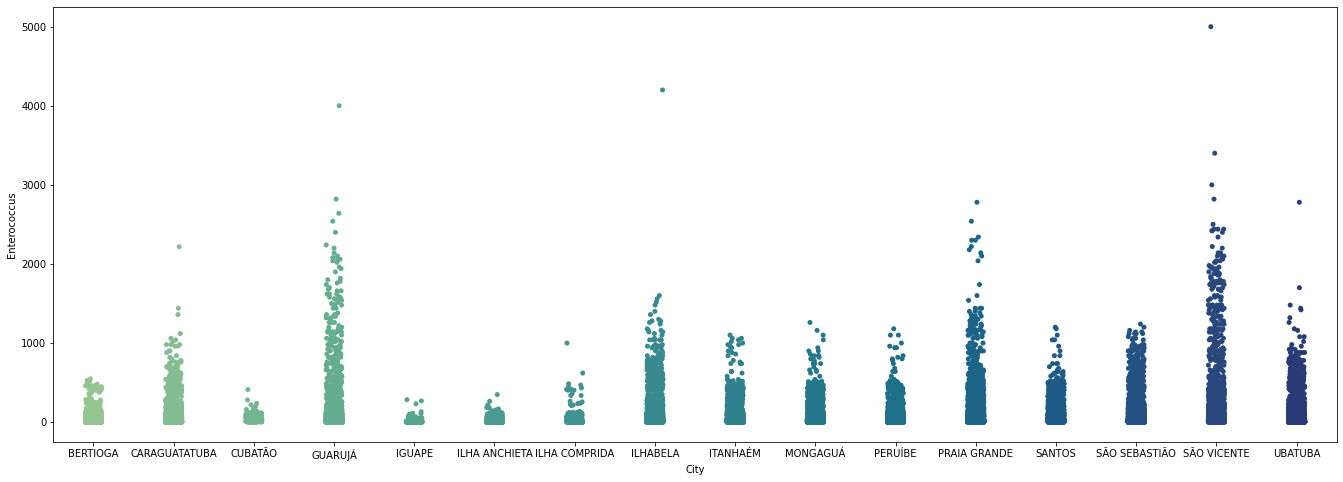

In [ ]:
# Organização do stripplot
plt.figure(figsize = (23, 8))
ax = sns.stripplot(x="City", y="Enterococcus", data = beachlist, palette = 'crest')

plt.show()

Já o **joinplot** apresenta a relação entre o número de coletas realizadas, os anos e a quantidade de *Enterococcus* presentes na água.

Diante o exposto é possível visualizar que no ano de 2012 houveram coletas acima de 4000 CFU/ 100ml, a primeira, a coleta de 5000 CFU/ 100ml diz respeito ao município de São Vicente, e a de 4000 CFU/ 100ml a Guarujá, conforme está apresentado no gráfico anterior.

Ilhabela, também apresenta uma coleta com valores significativos de *Enterococcus*, entretanto, a mesma diz respeito ao ano de 2017.

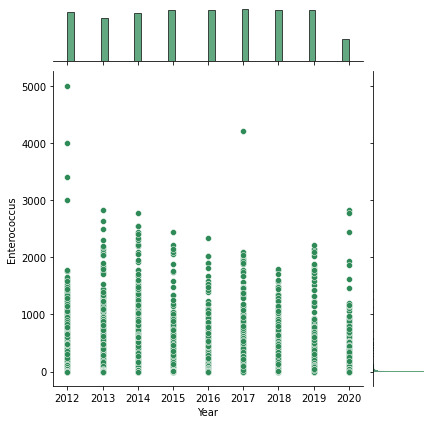

In [ ]:
# Organização do jointplot
# Ainda não foi realizada a análise entre a relação da coluna "Year" com "Enterococcus"
sns.jointplot (x = 'Year', y = 'Enterococcus', data = beachlist, color = 'seagreen' )

plt.show()

Posterior a elaboração dos gráficos acima, houve um questionamento quanto a distribuição de coleta por município, que pode ser respondida através da análise do gráfico *violinplot*.
Através dele podemos observar as seguintes informações:
* Ano de inicío e fim das coletas;
* Distribuição e continuidade das coletas através do cenário estipulado pelo repositório.


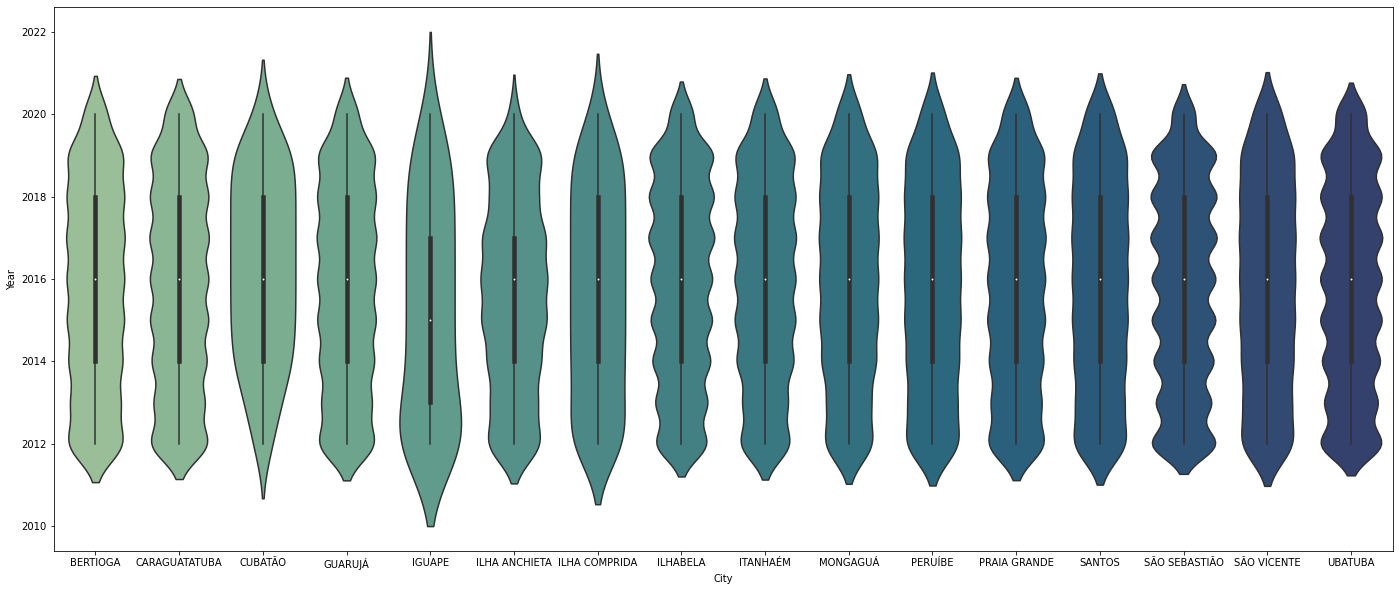

In [ ]:
# Elaboração do violinplot
# Quantas coletas, durante os anos presentes na tabela, foram realizados nos municípios citados? 
plt.figure(figsize = (24, 10))
sns.violinplot(y='Year', 
                x='City', 
                data = beachlist, palette = 'crest')


Após esse processo, organizou-se o dado que responde o seguinte questiomanento:

Qual é a distriuição de praias, por municípios? E a quantidade de *Enterococcus* presente na água? 

Essa dúvida podemos exclarecer a partir da elaboração do **boxplot**, também chamado como diagrama de caixa, que permite visualizar e analizar os dados citados anteriormente.

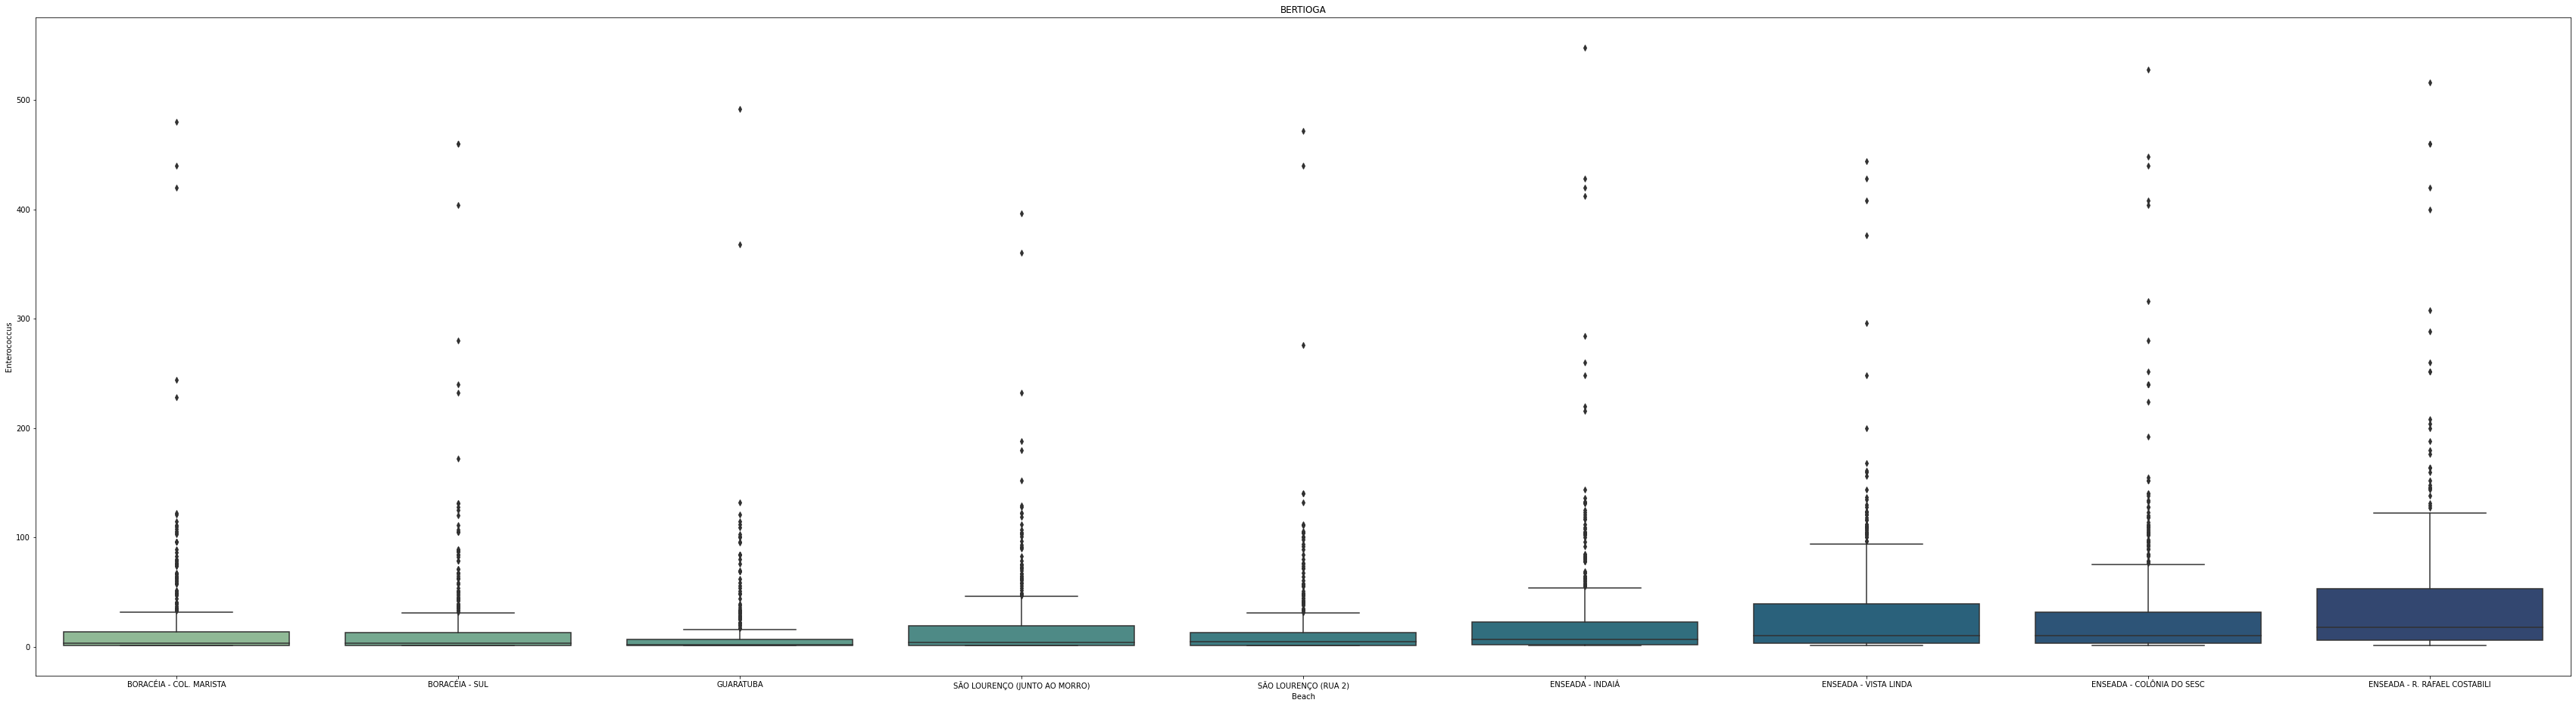

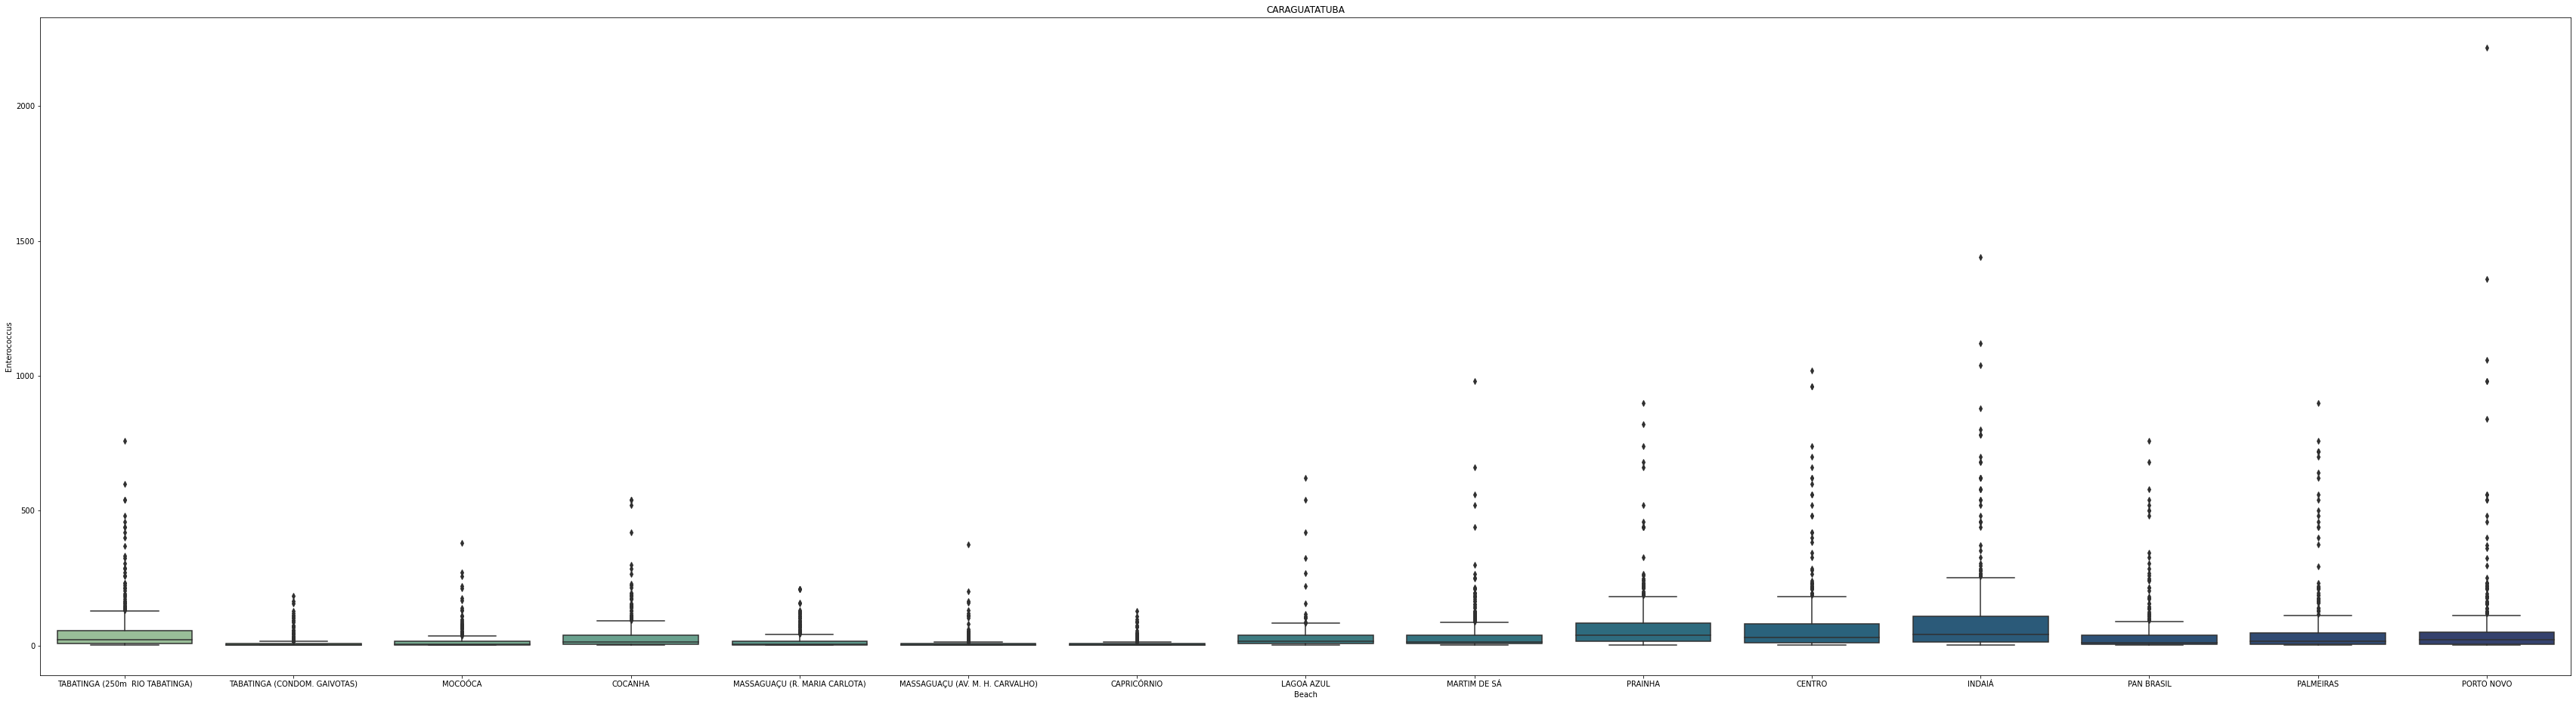

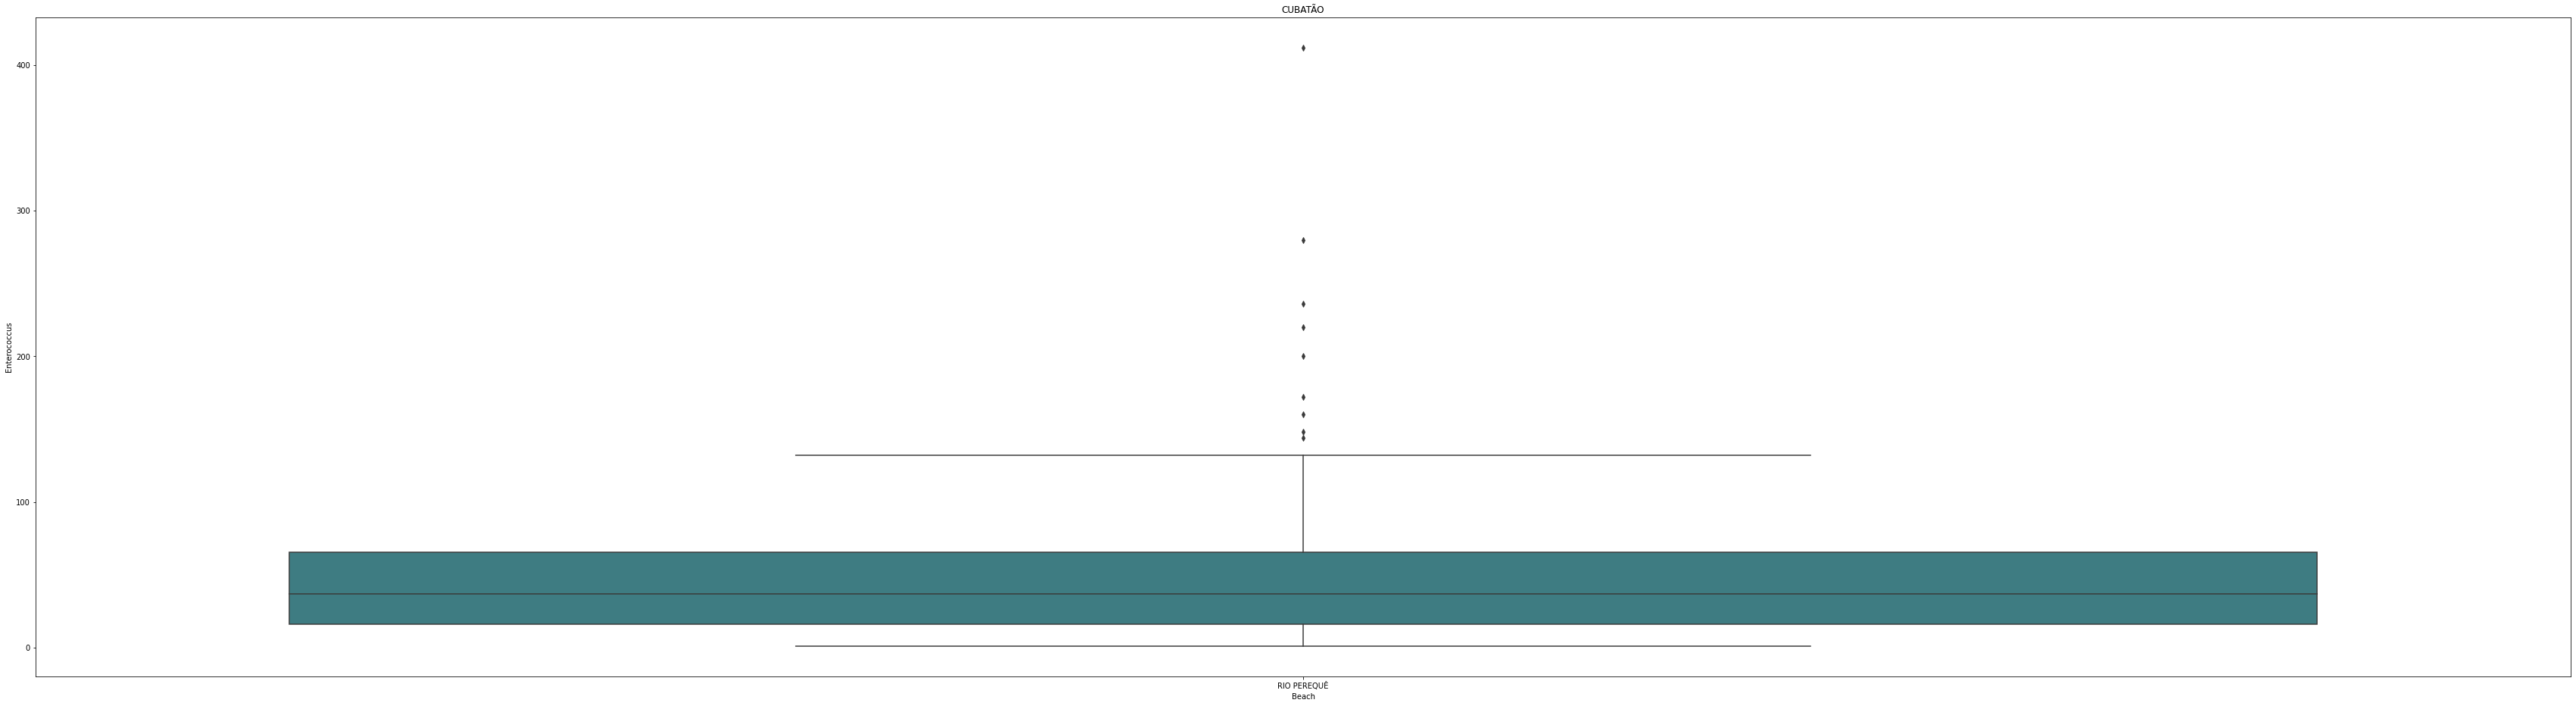

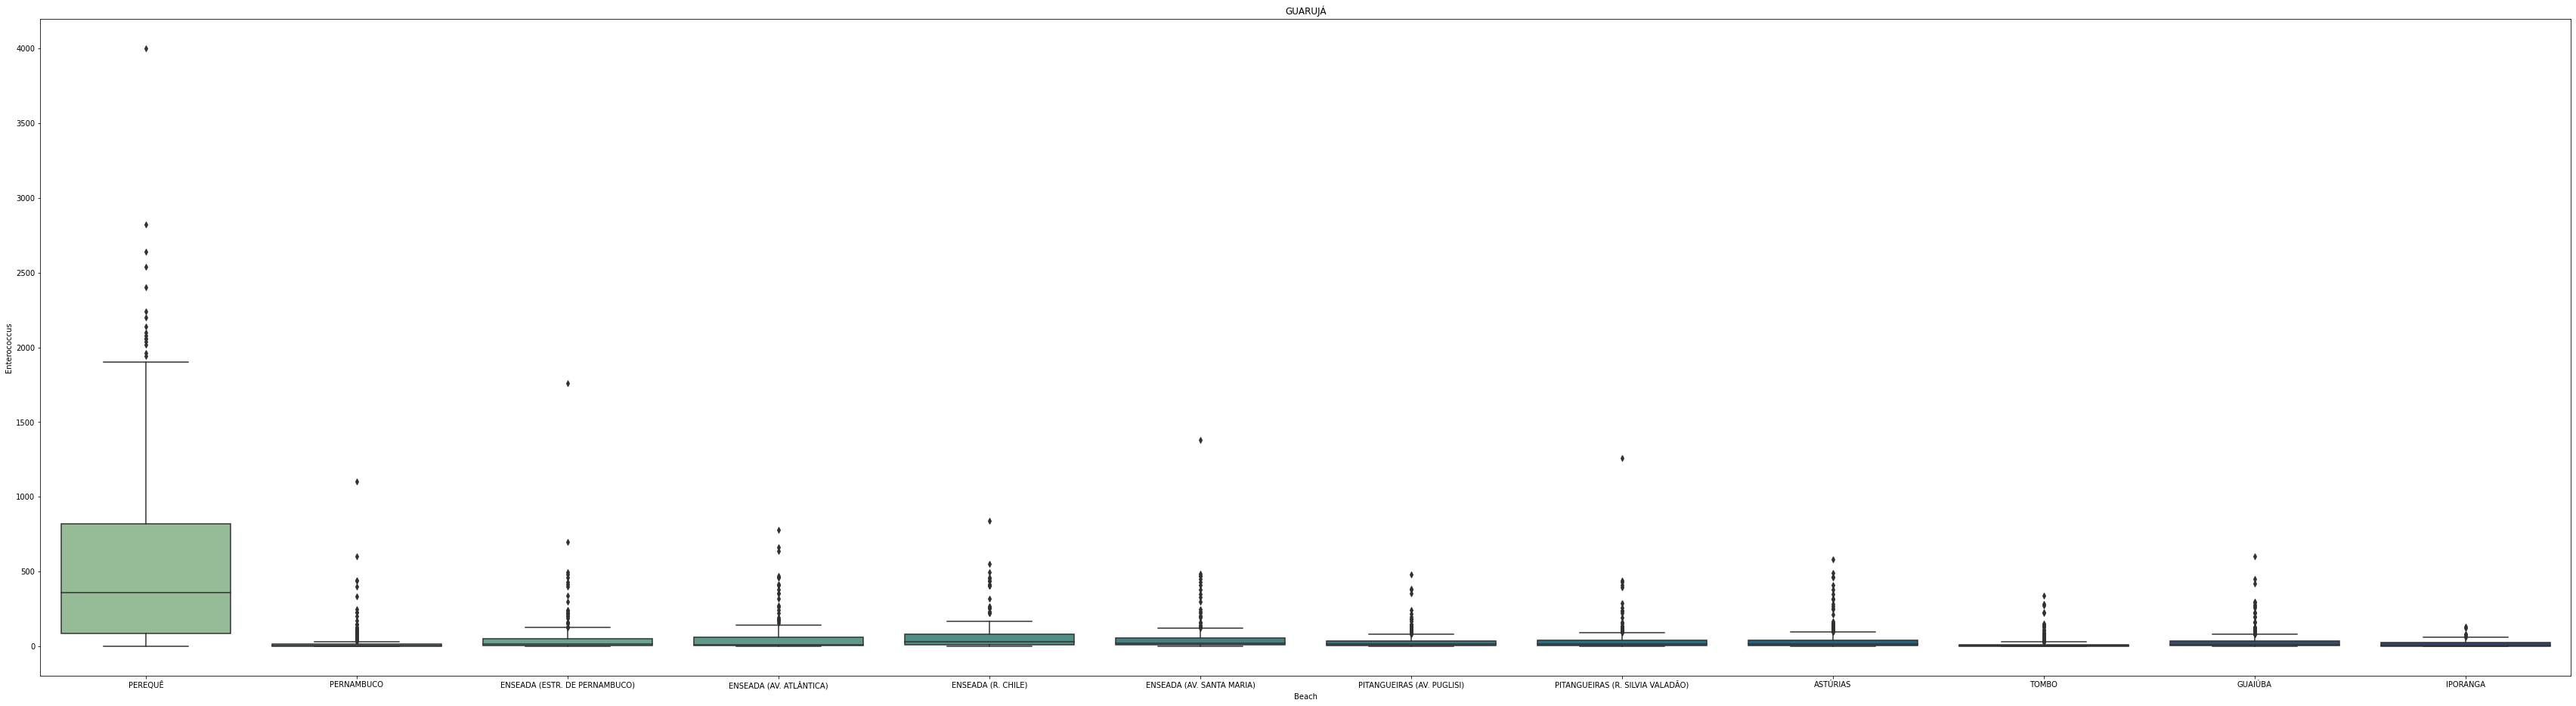

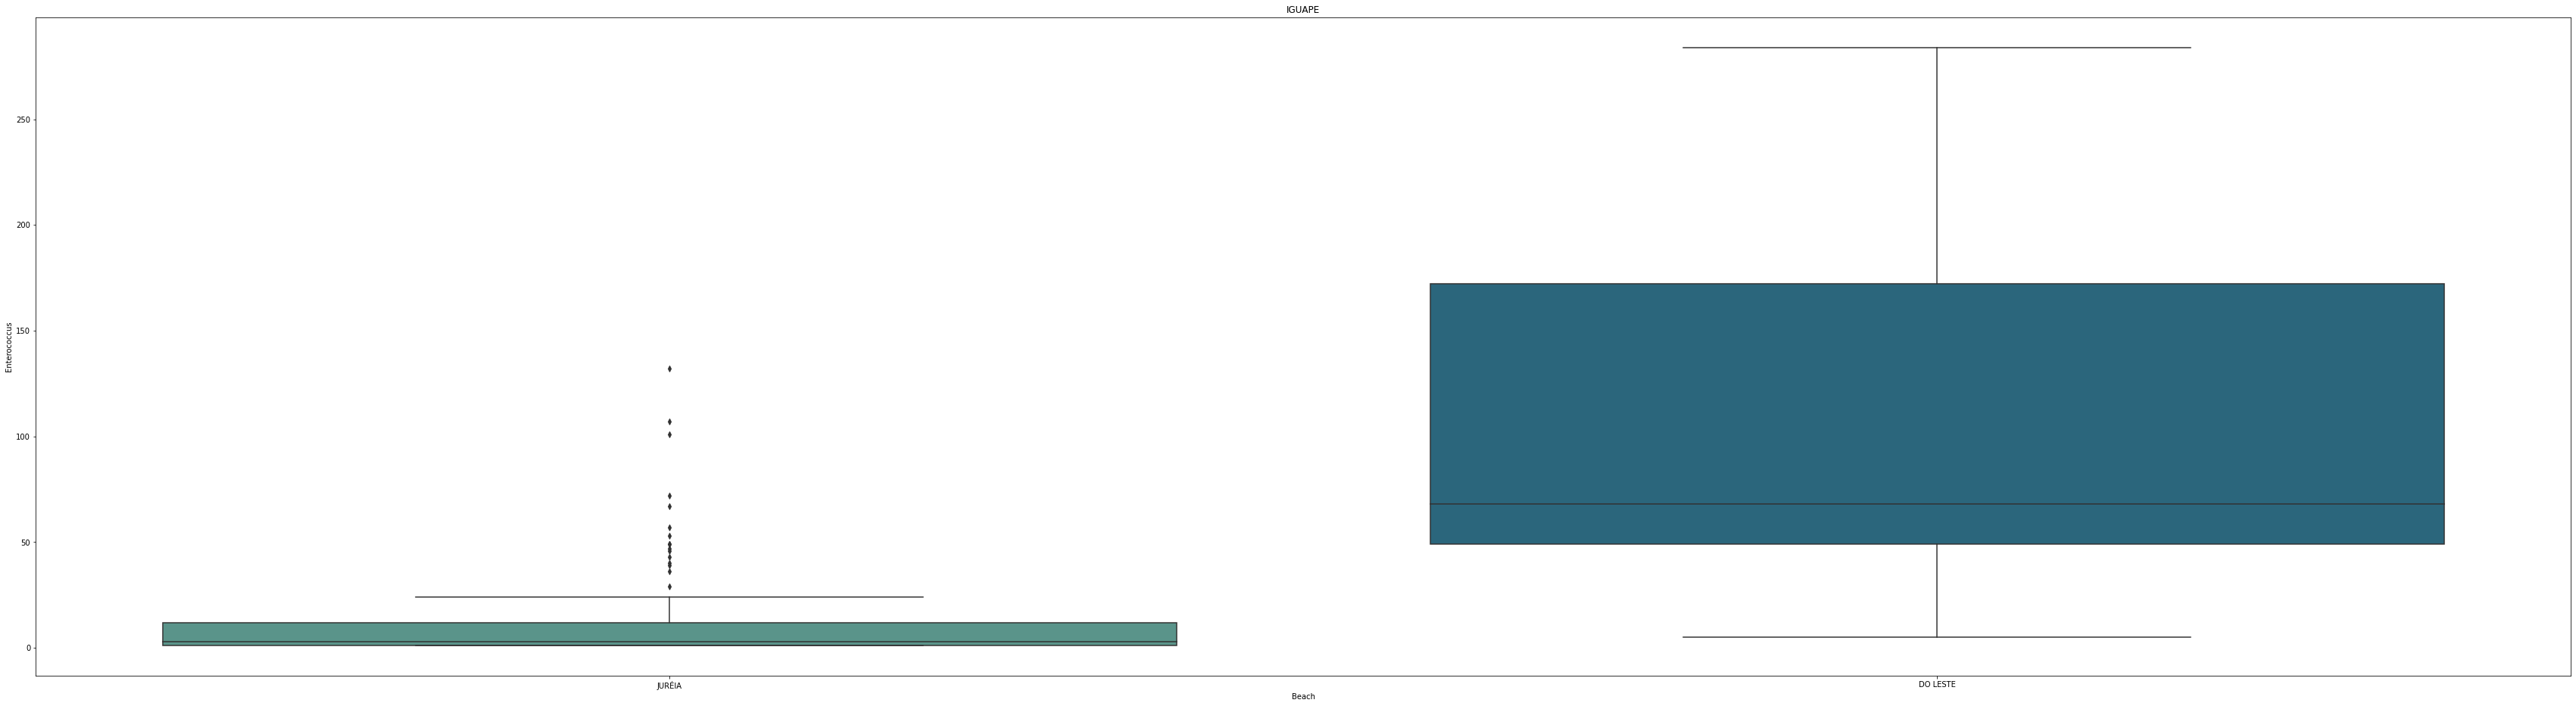

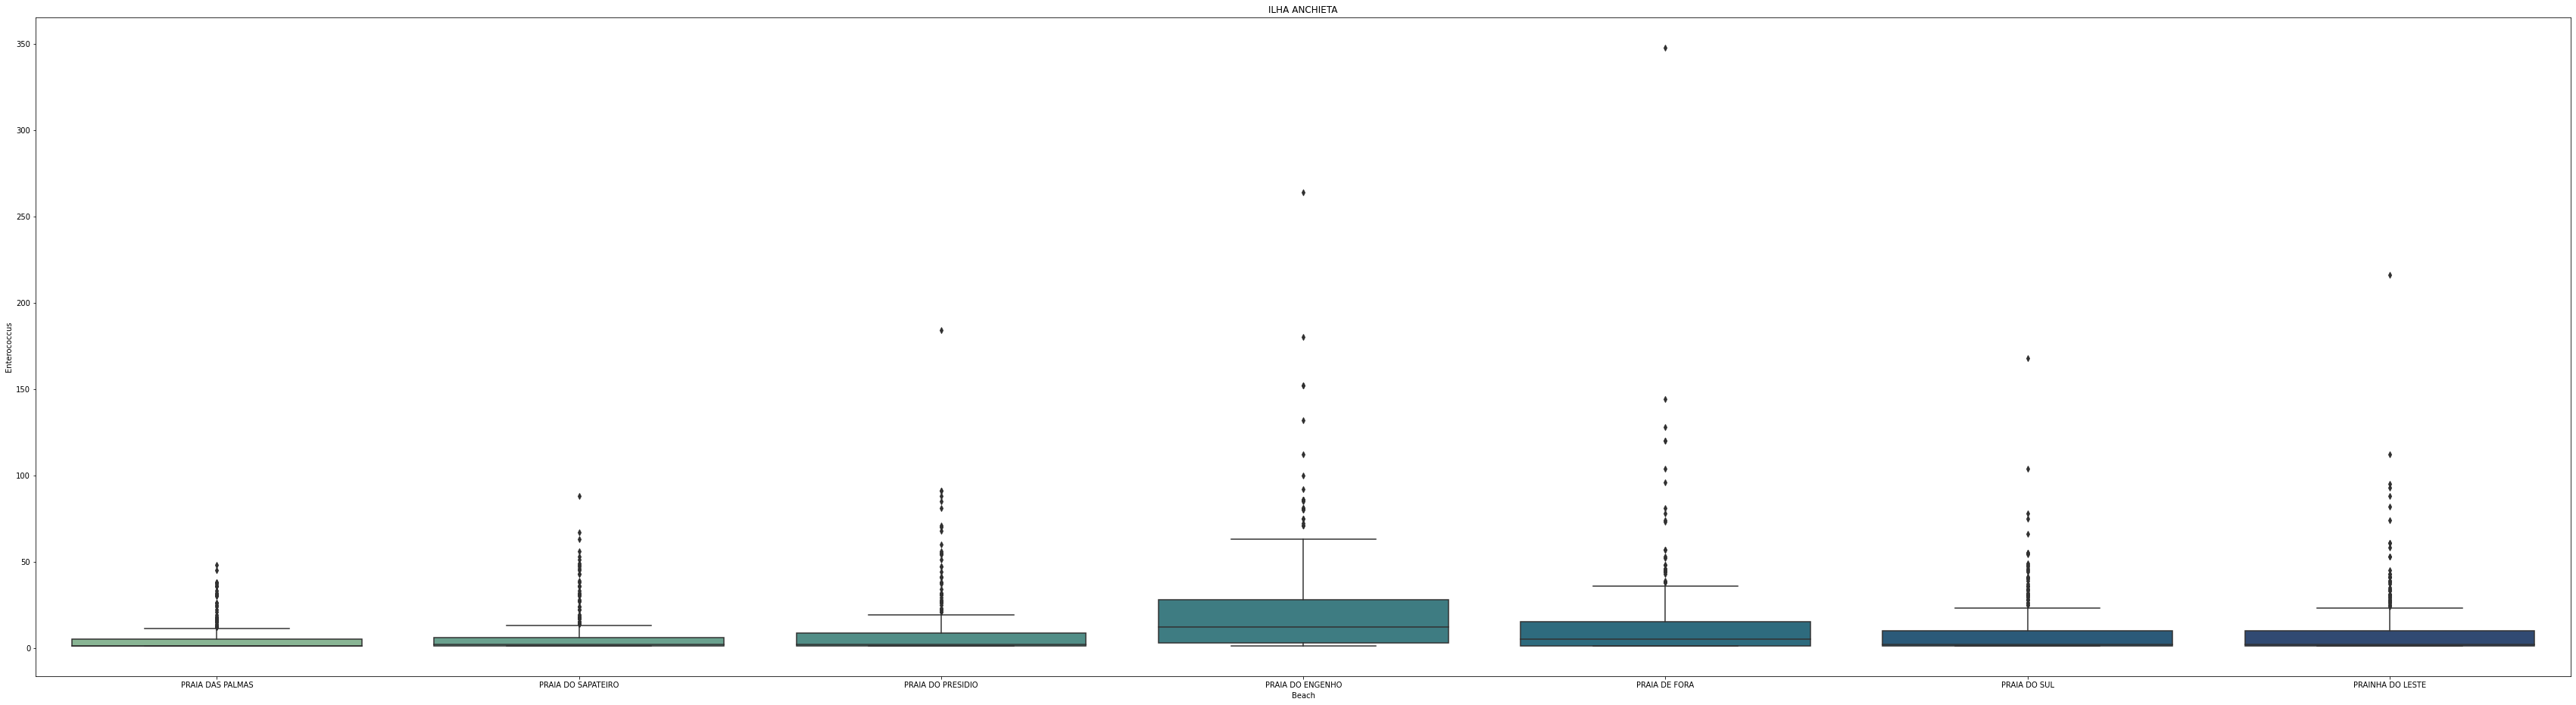

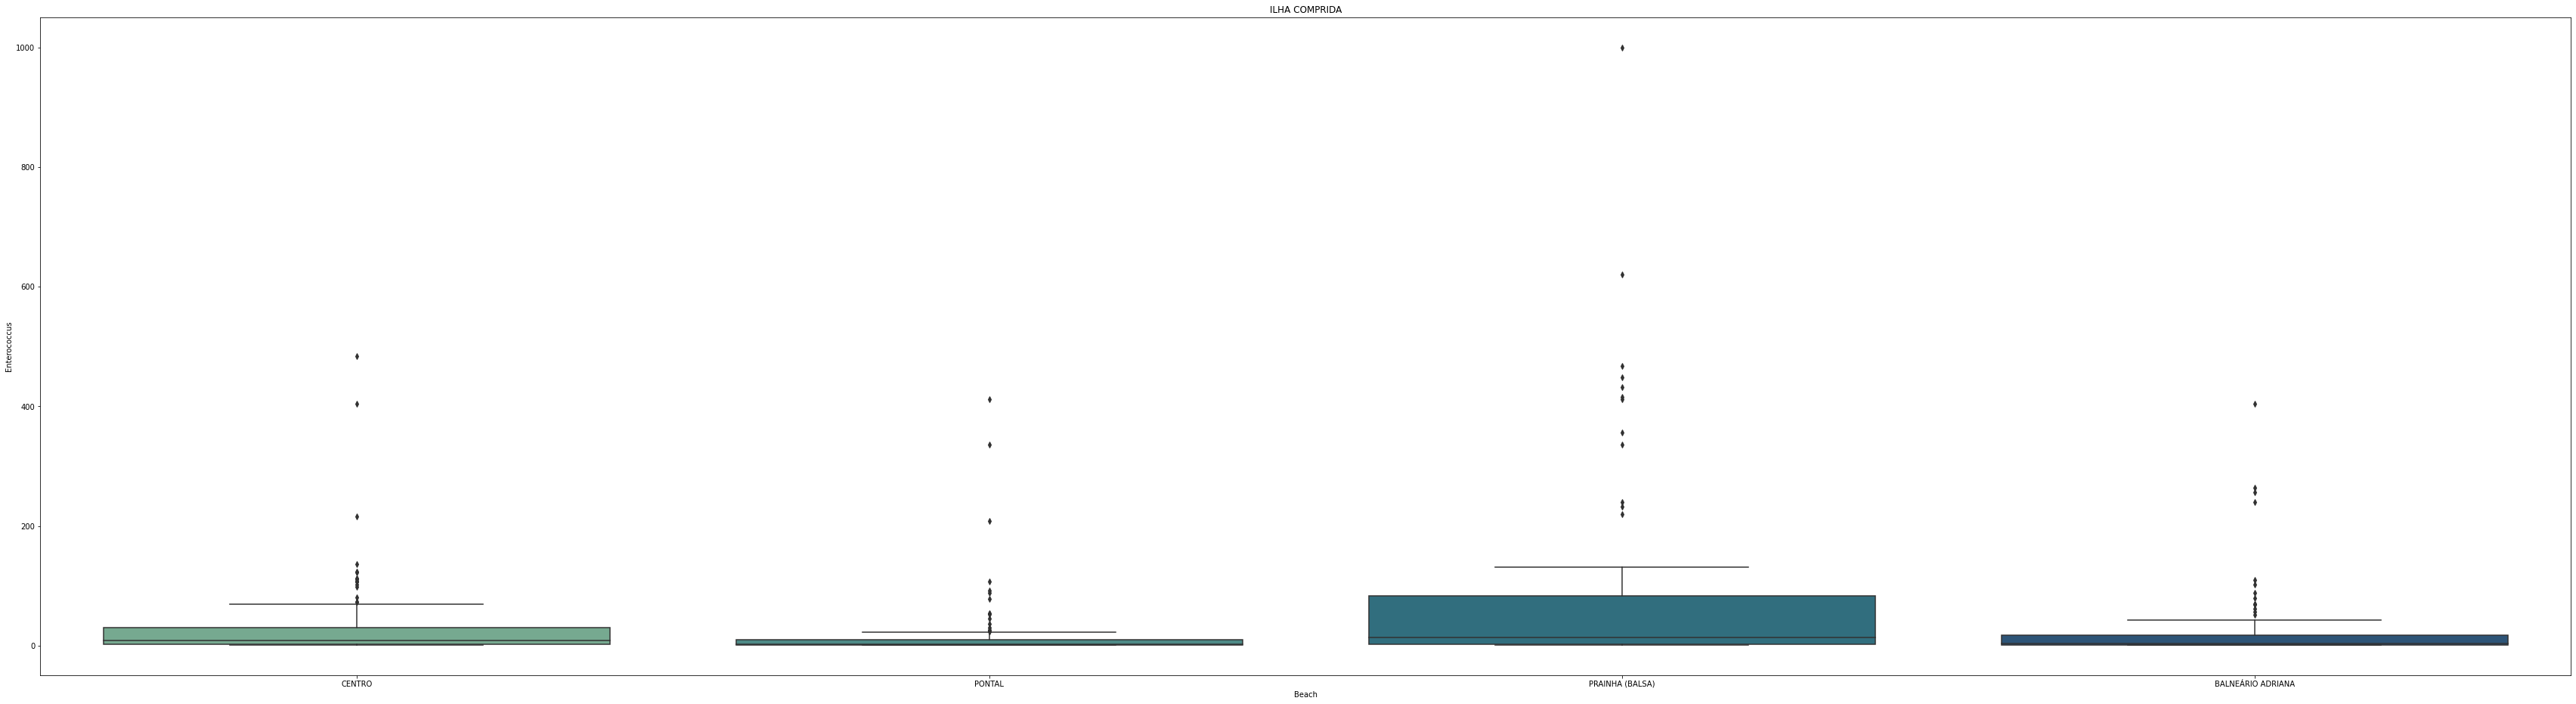

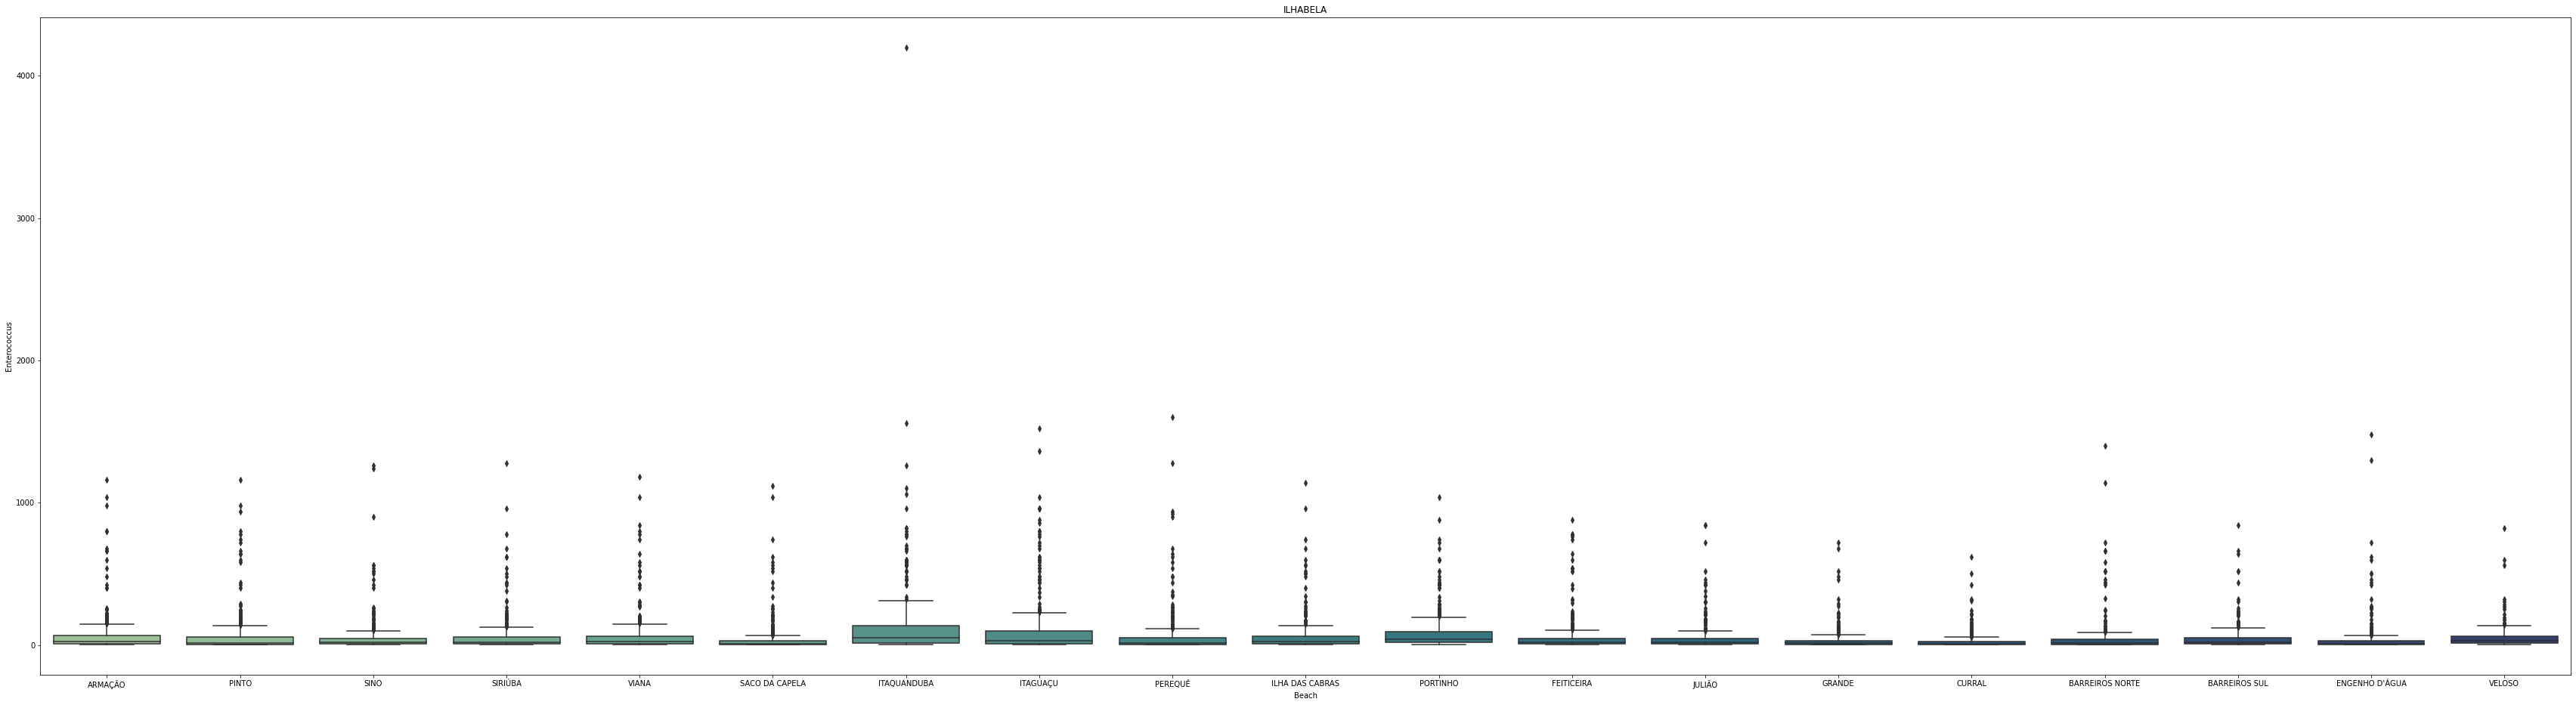

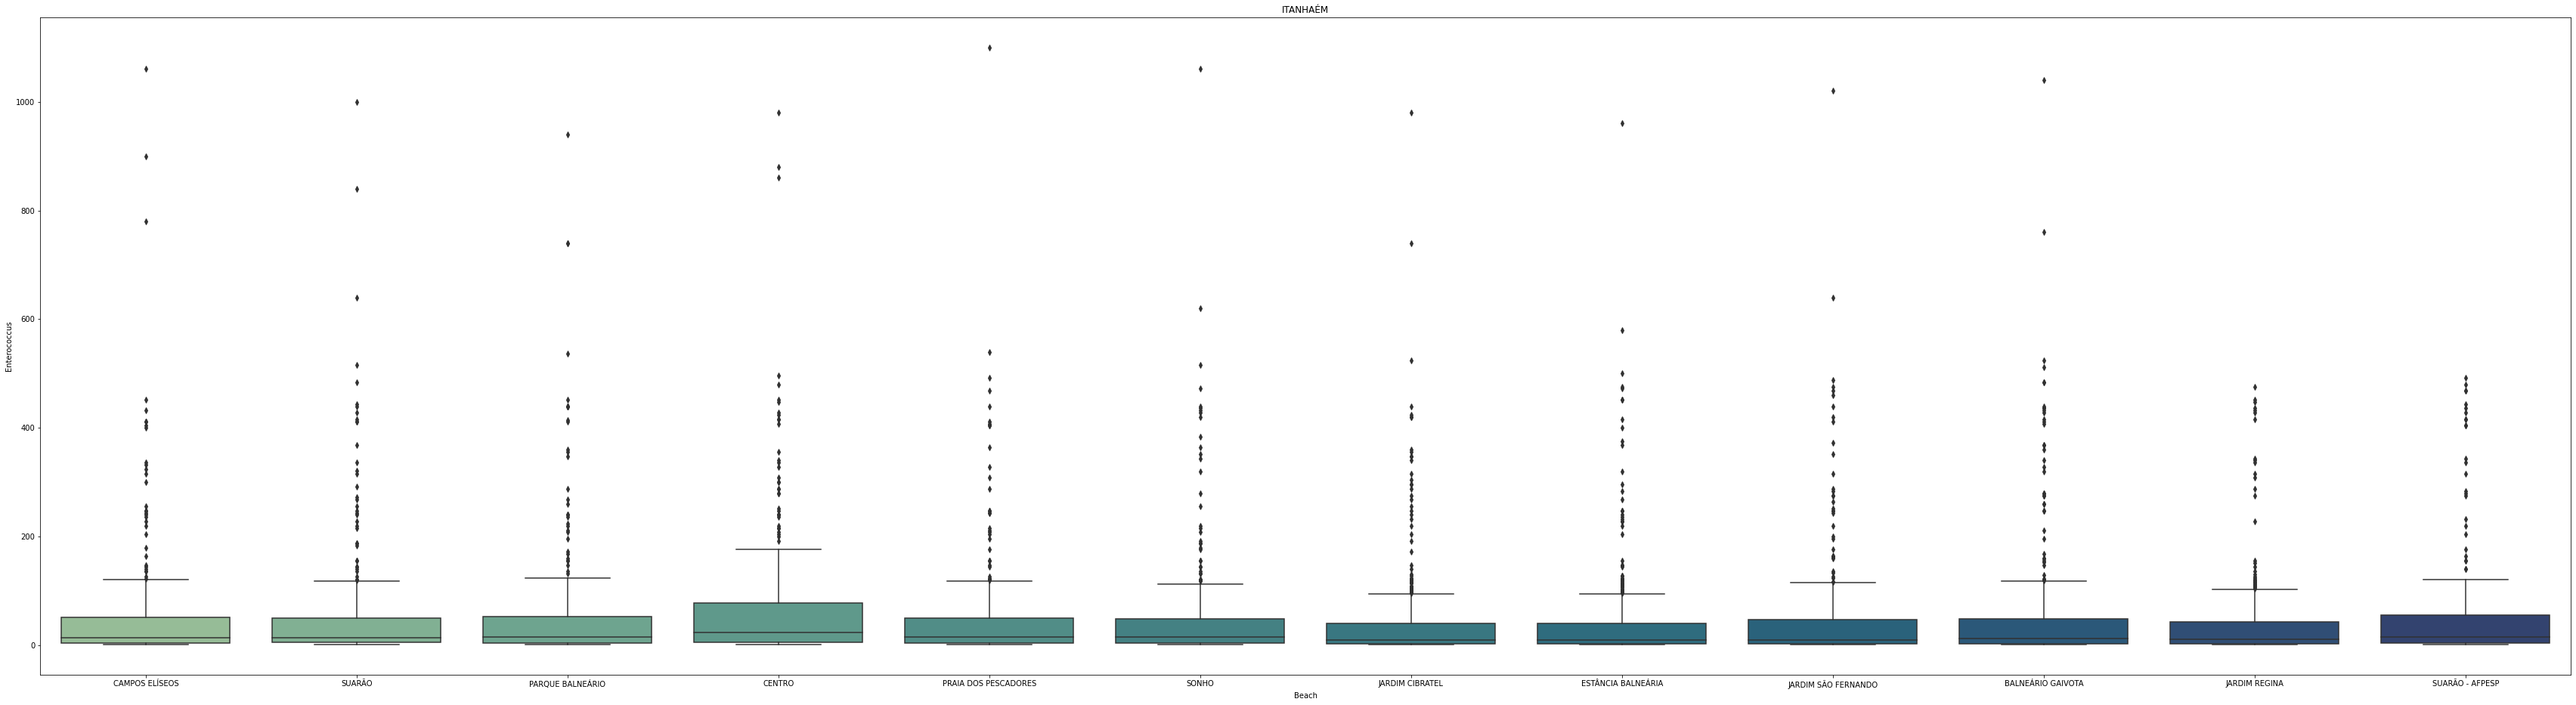

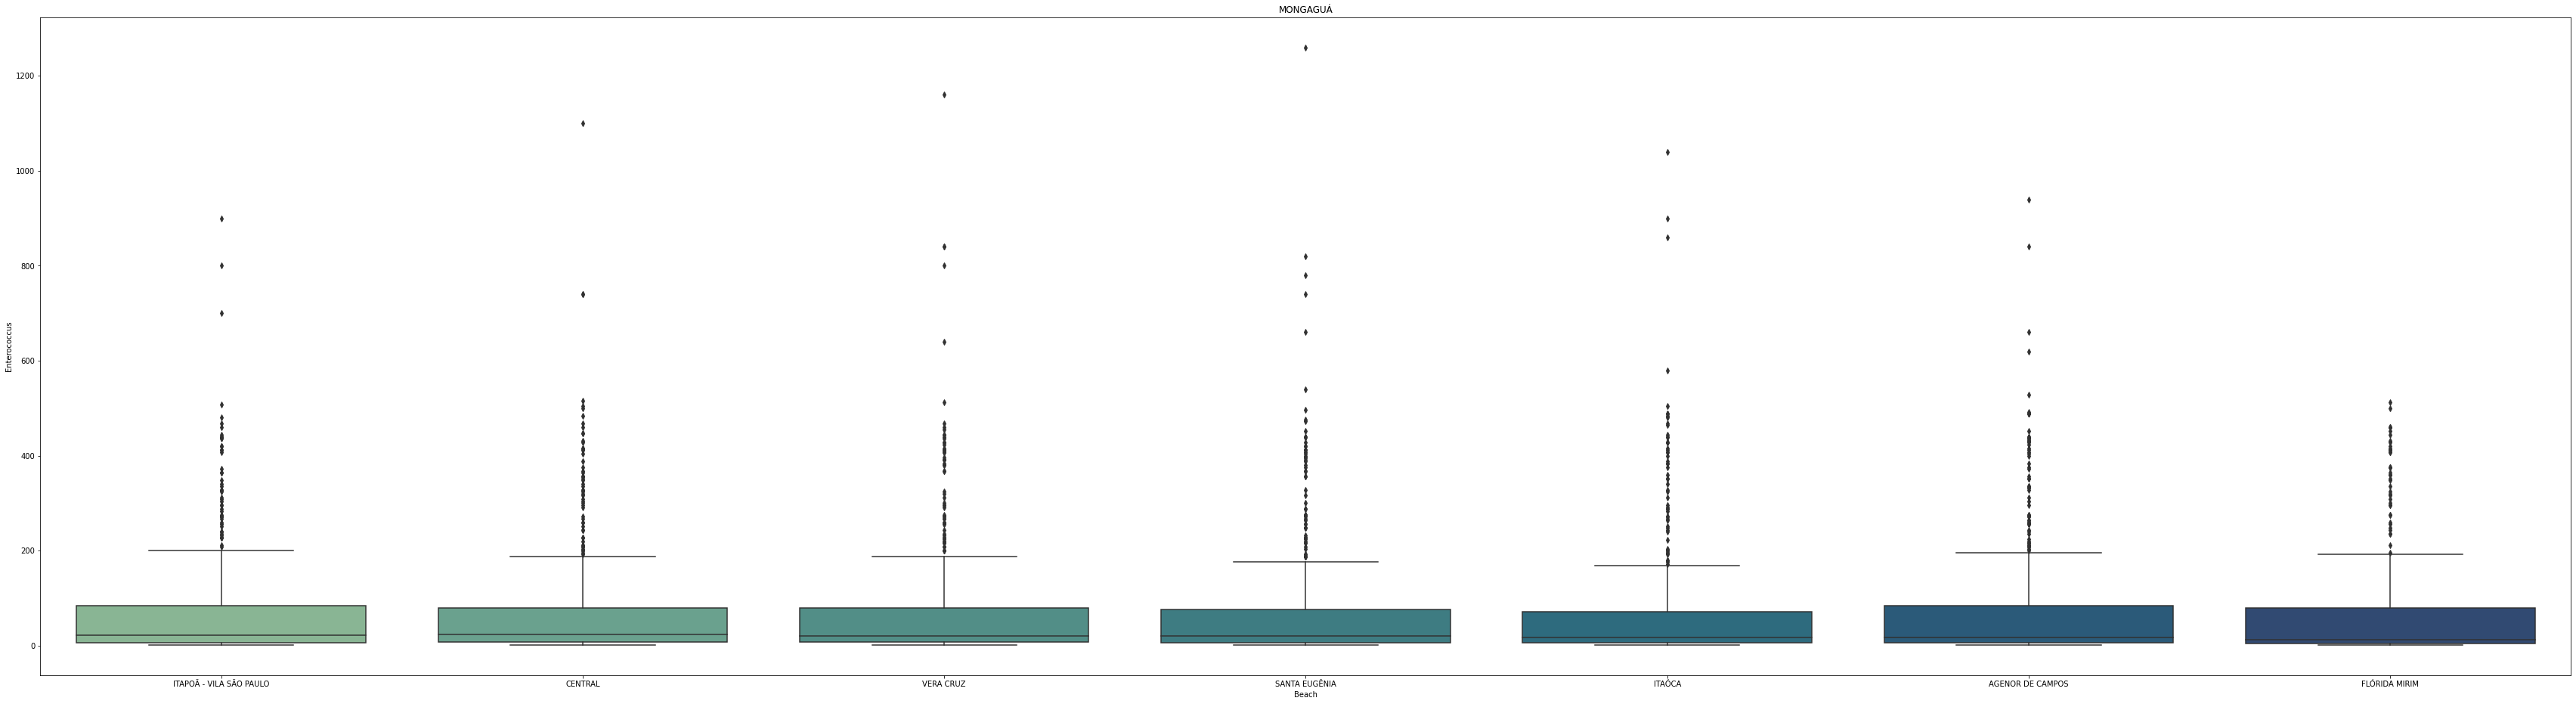

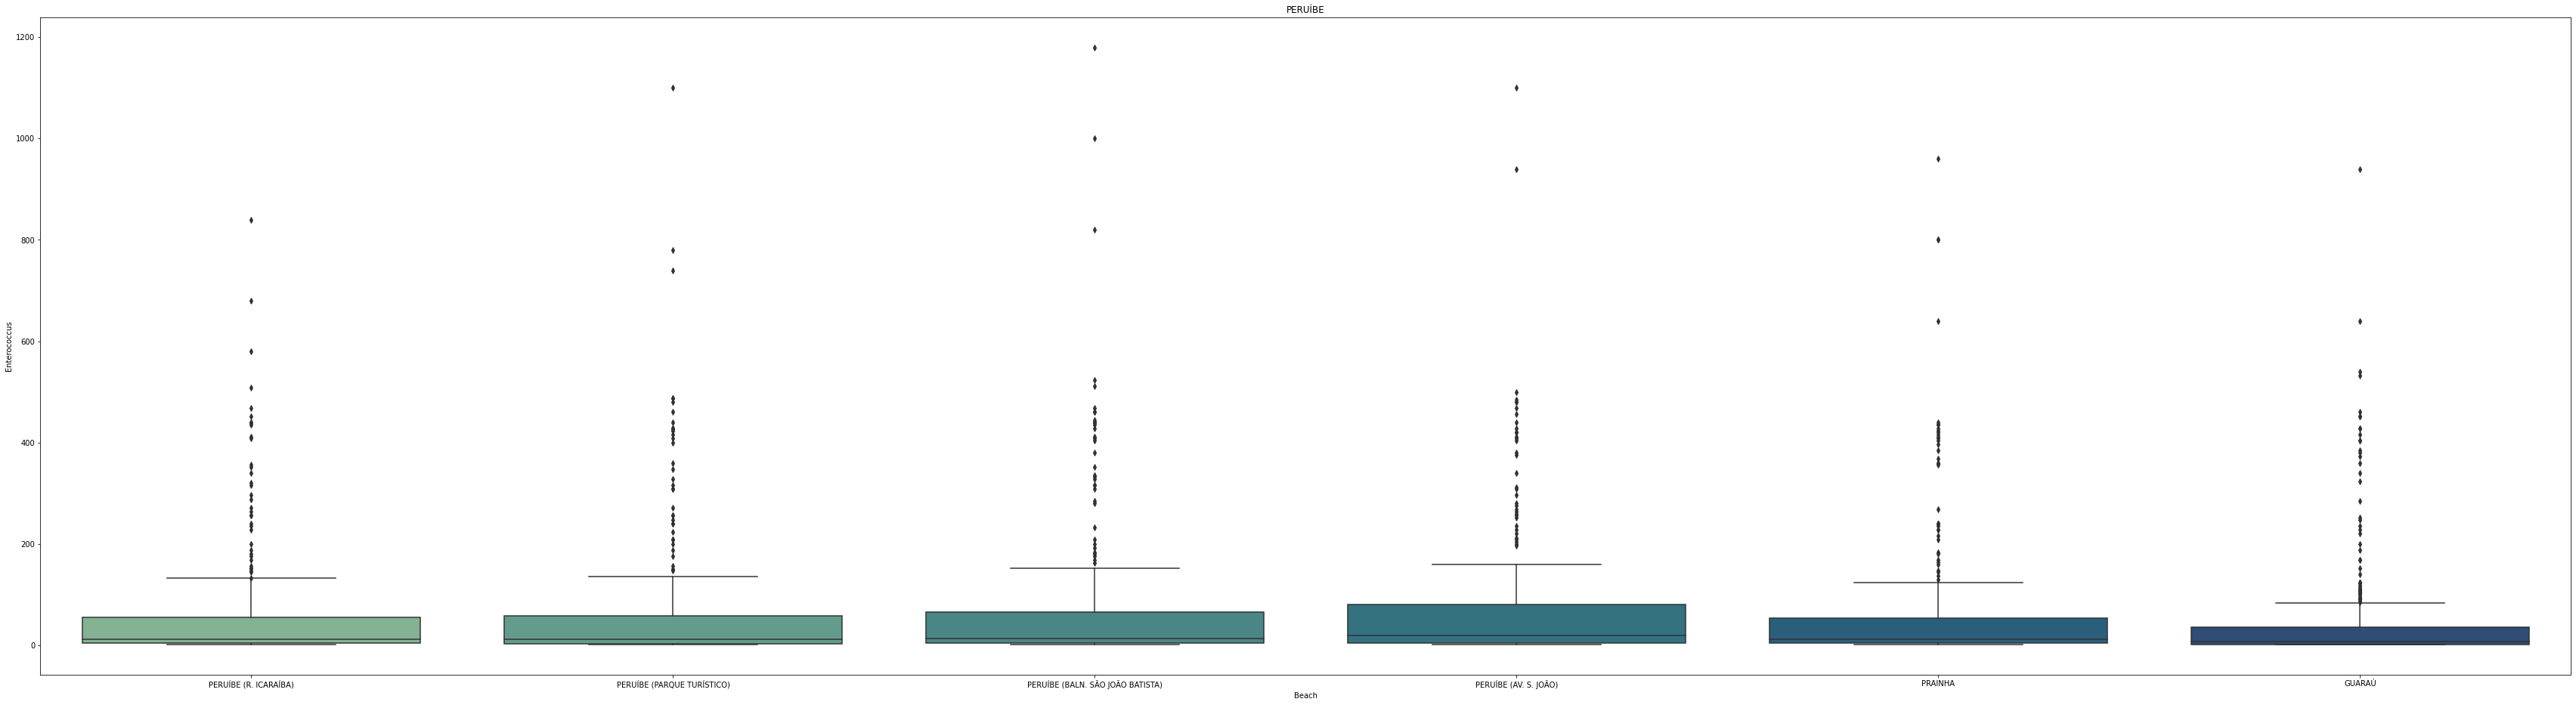

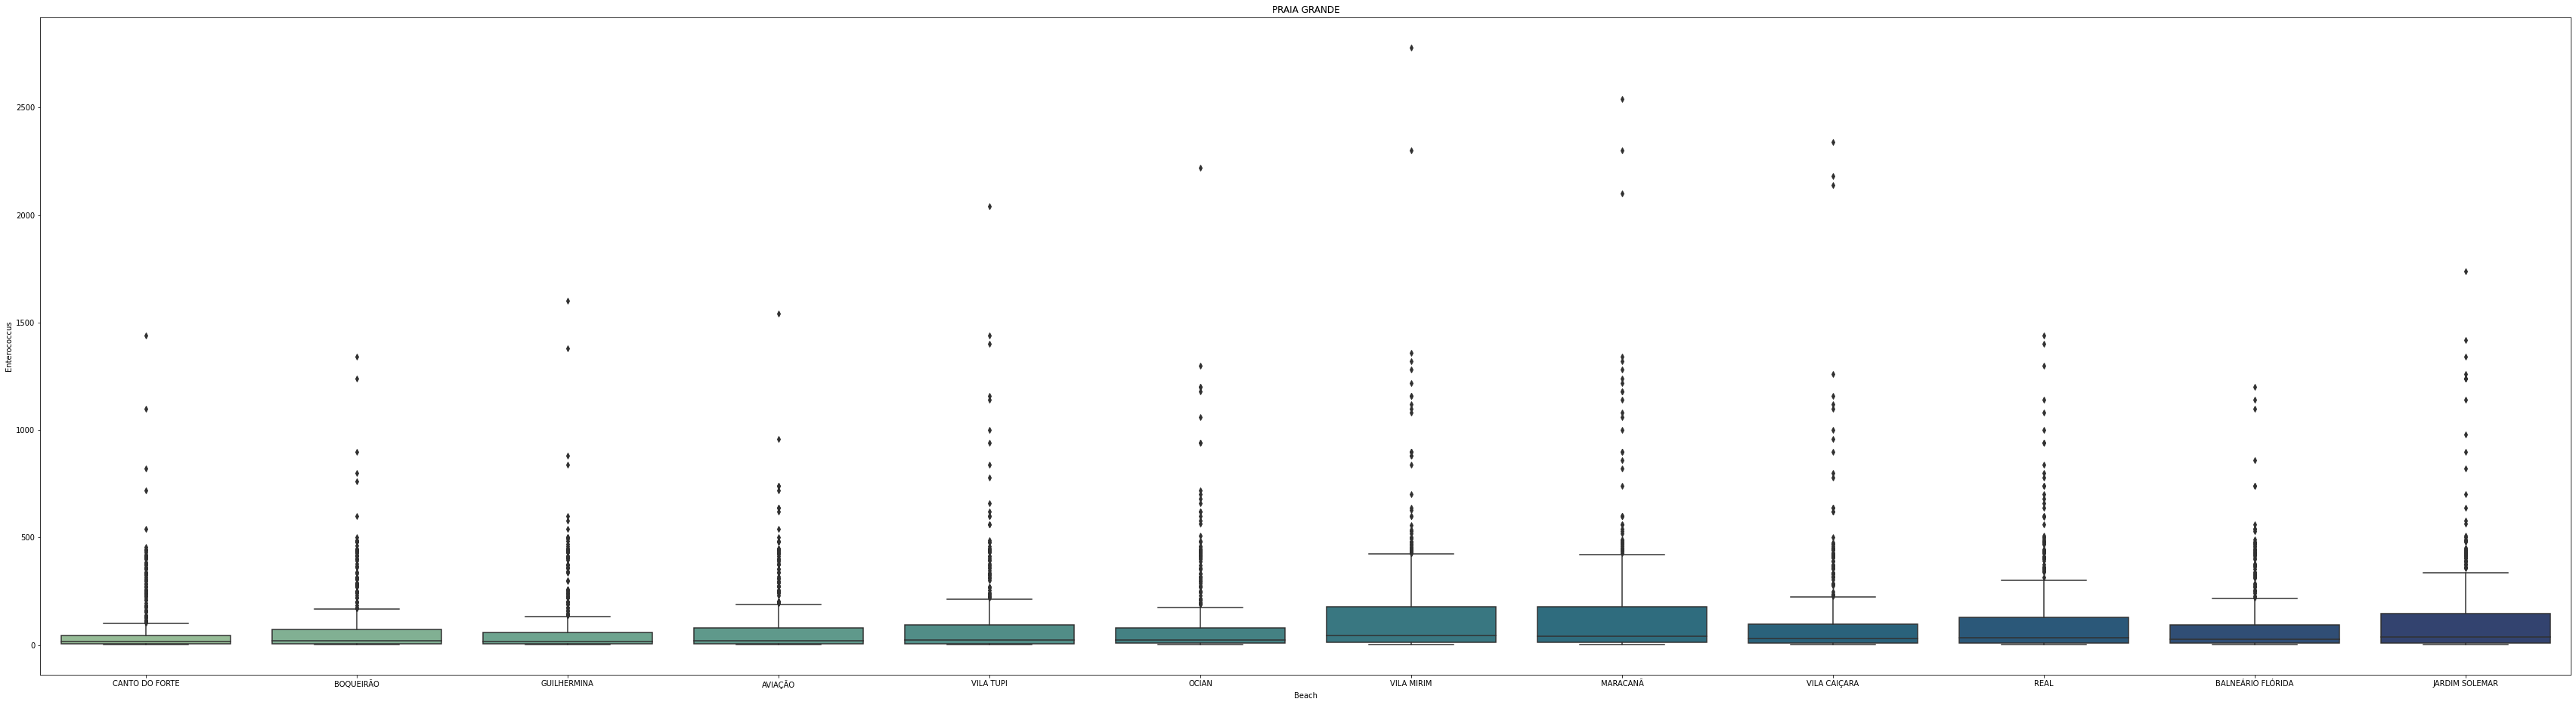

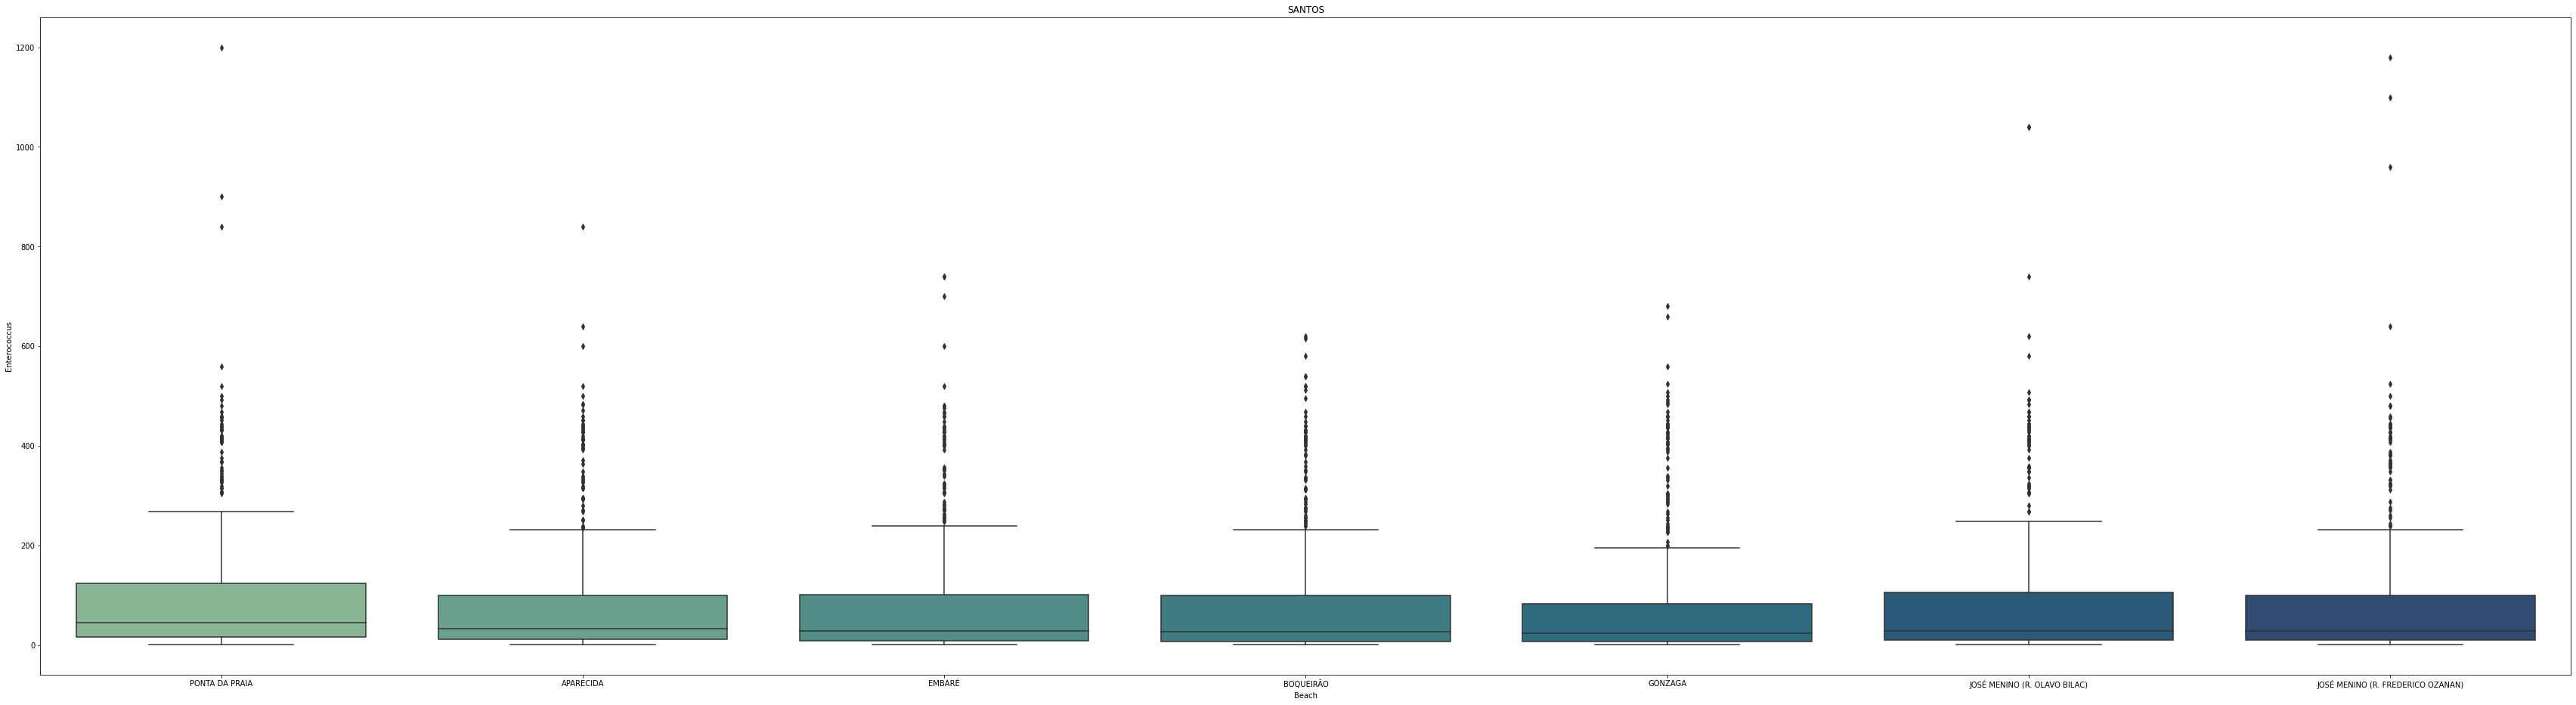

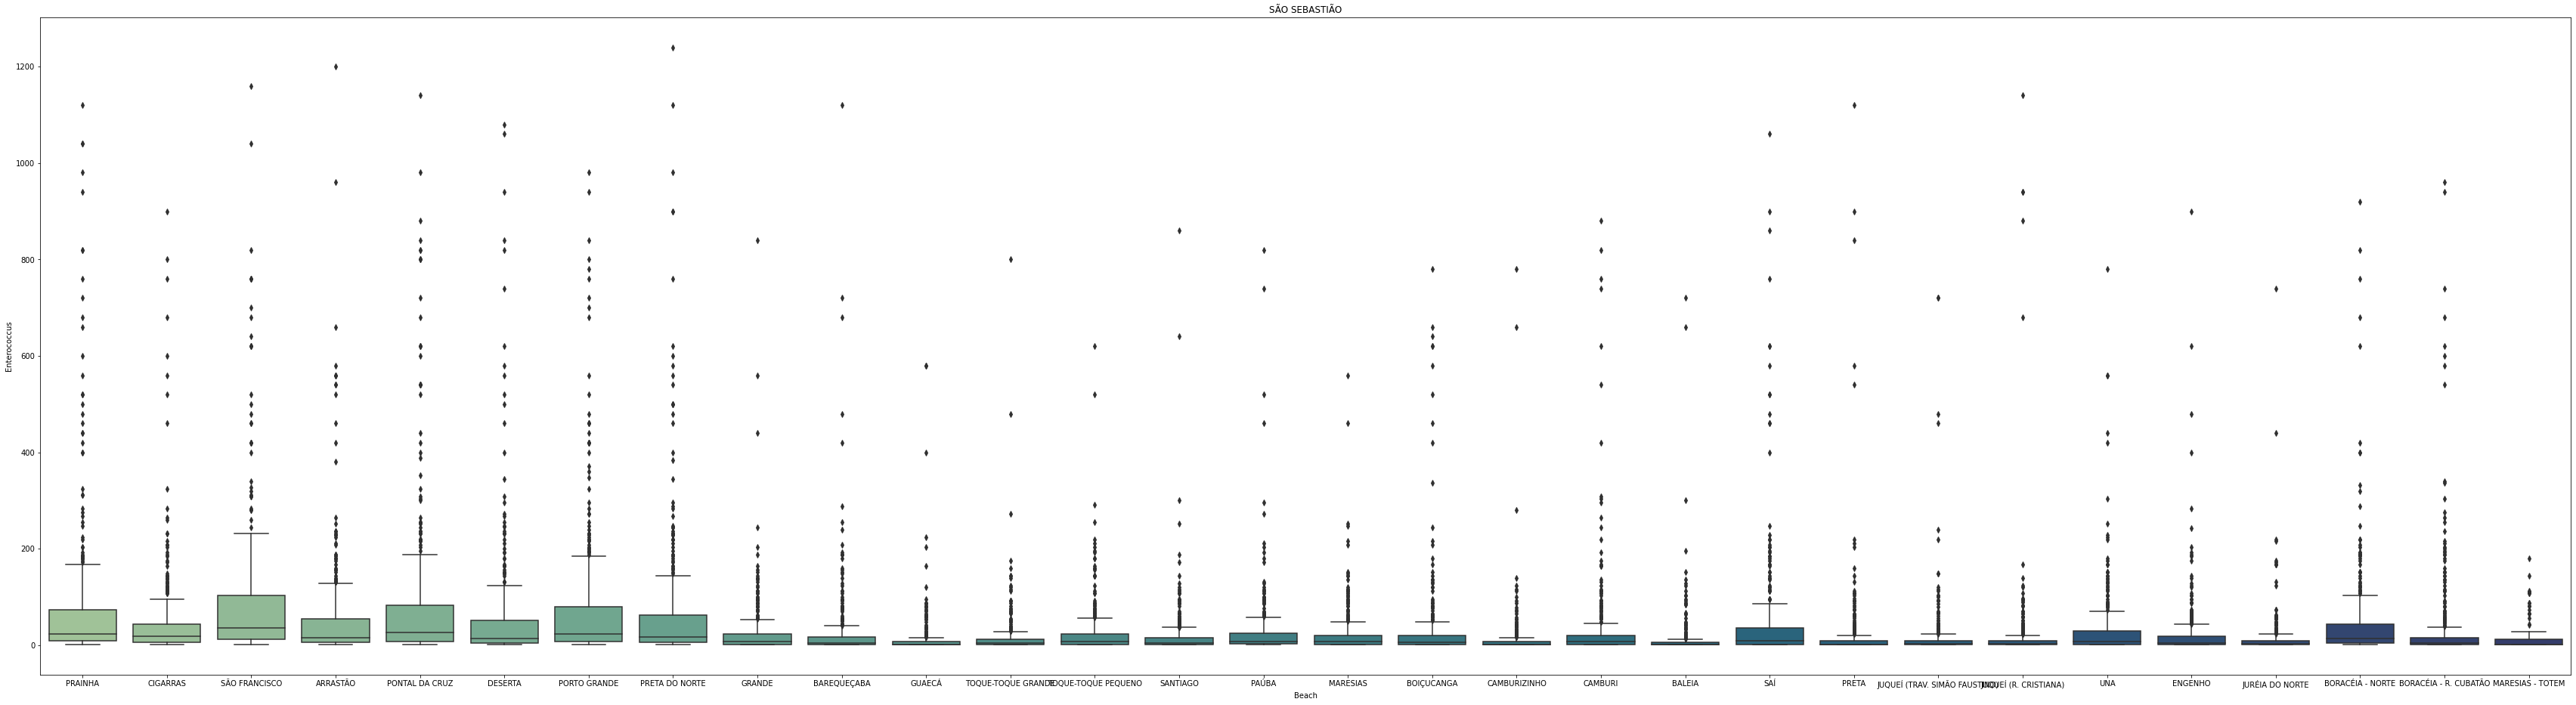

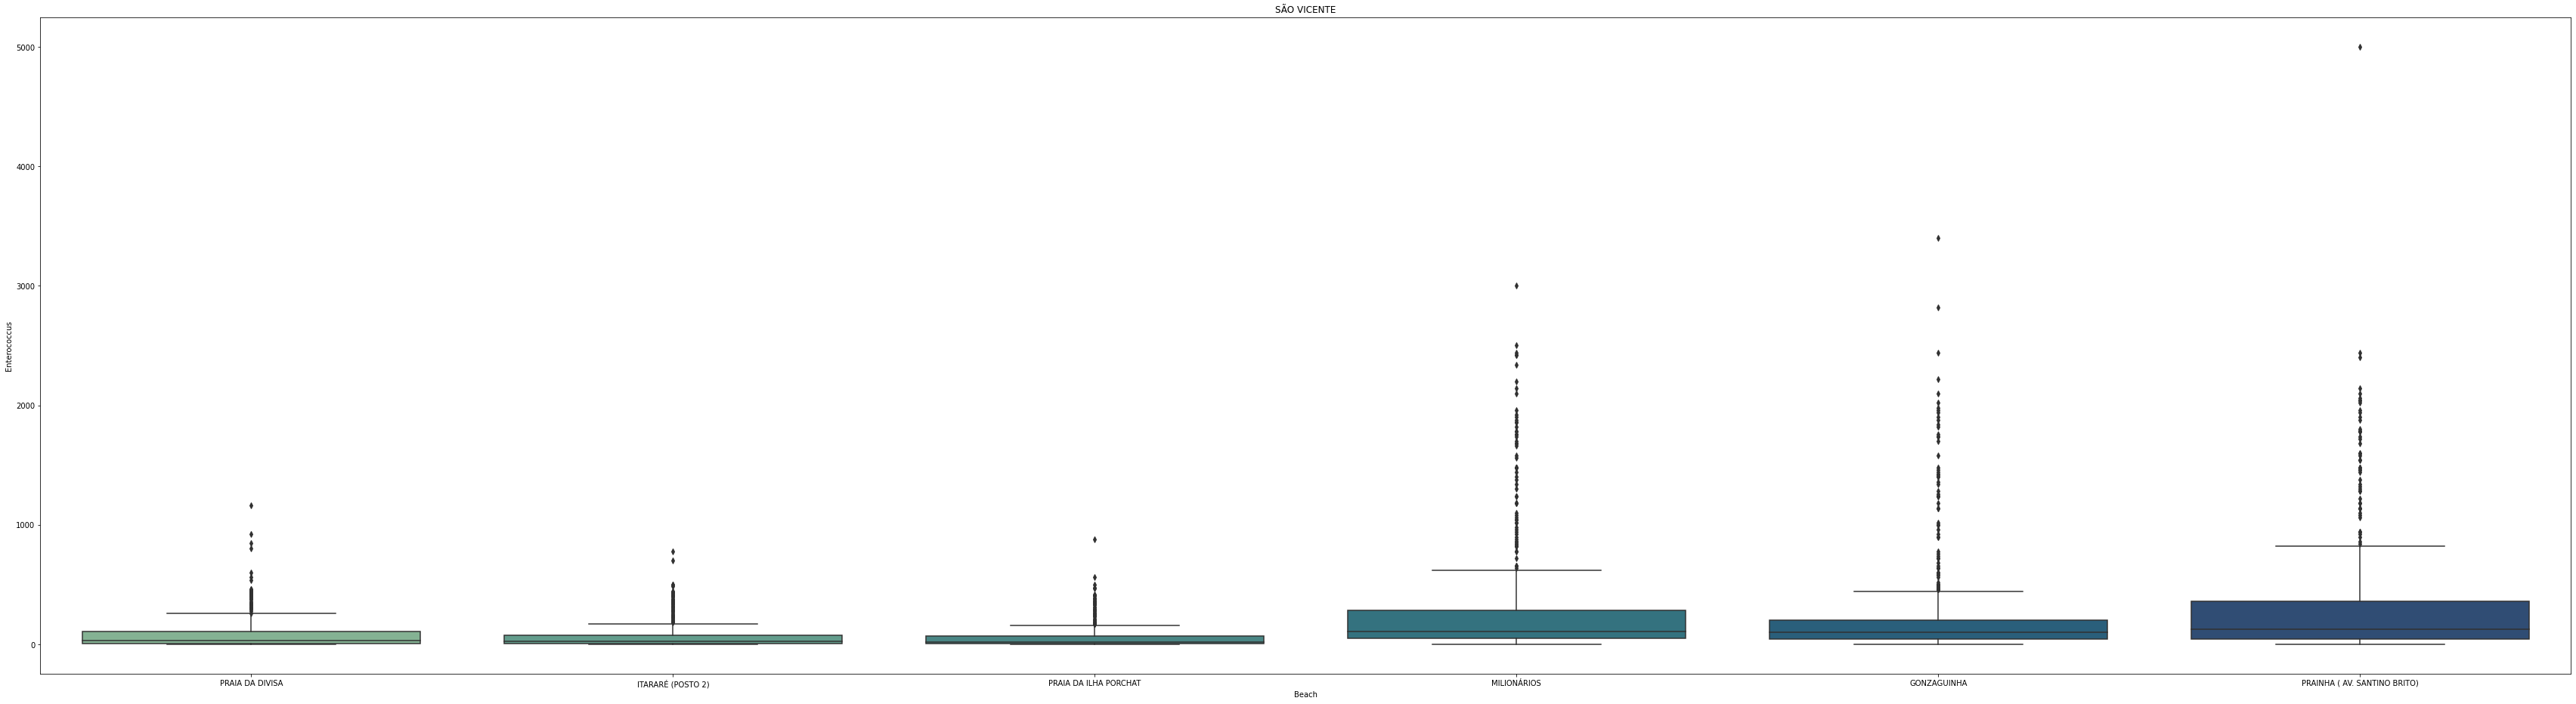

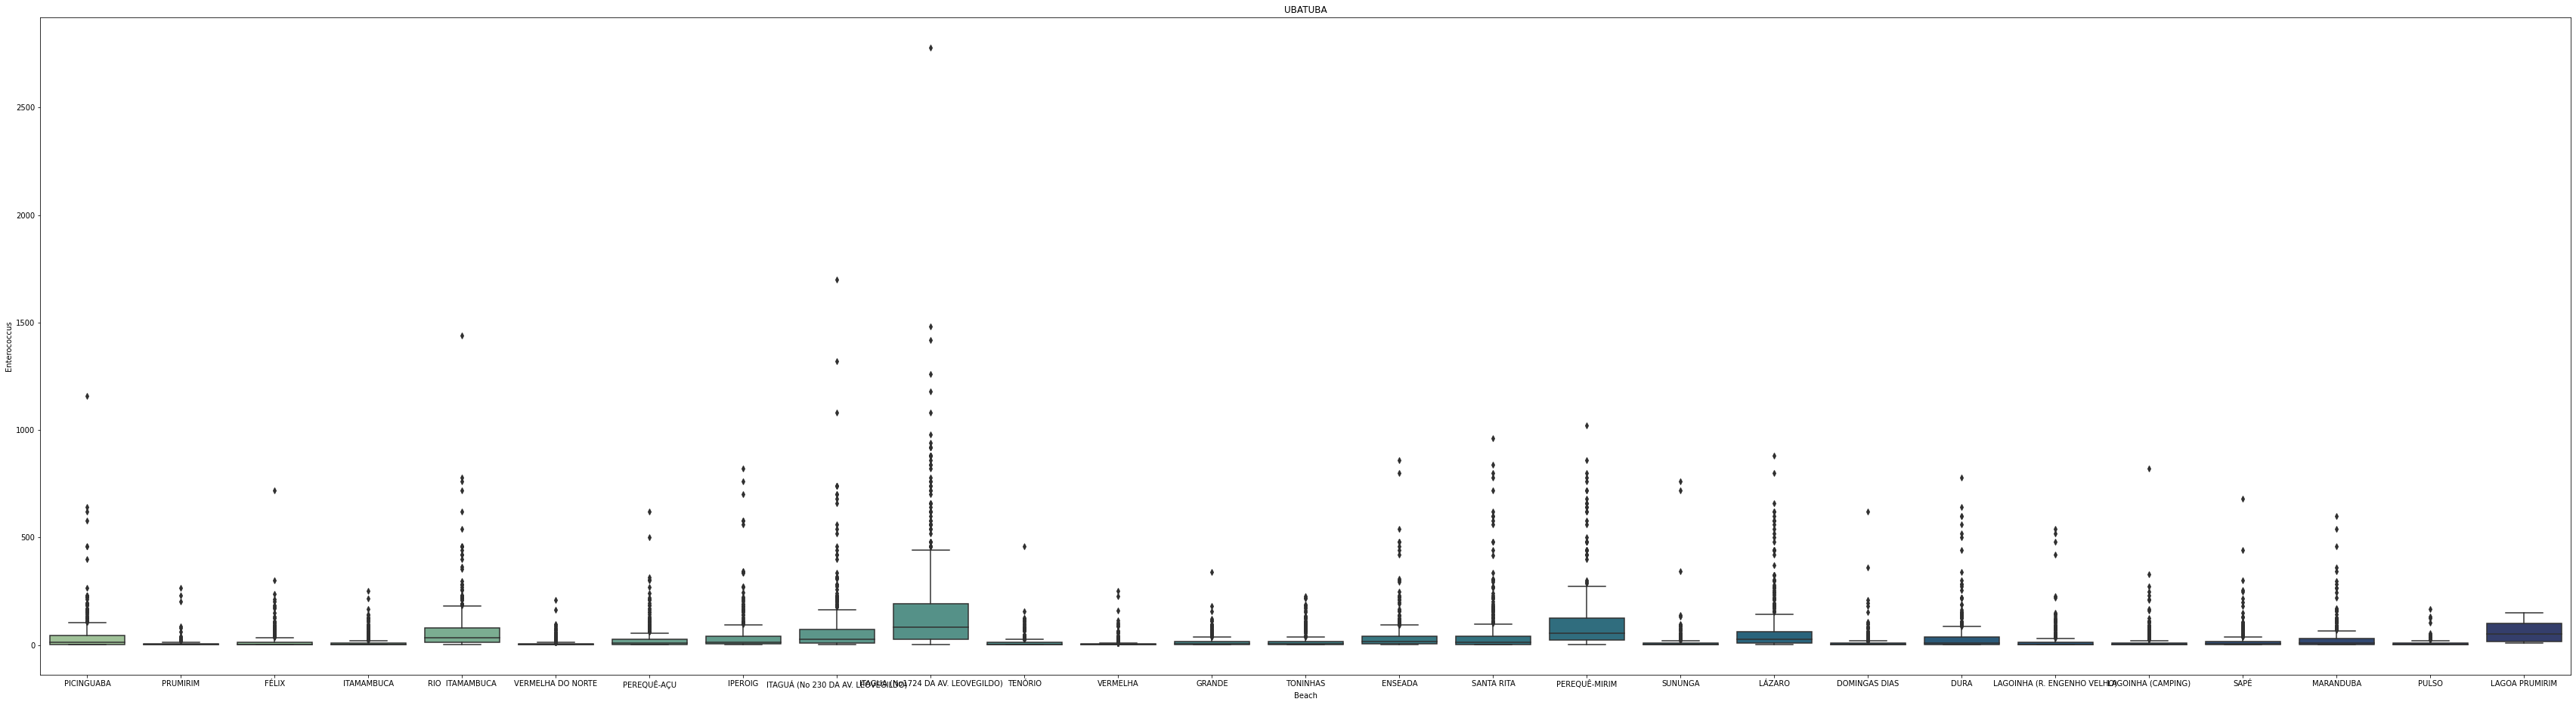

In [ ]:
# Elaboração do boxplot indivídual de cada município.
for city in beachlist.City.unique():
  plt.figure(figsize = (60, 16))
  sns.boxplot(y = beachlist['Enterococcus'], x = beachlist.loc[beachlist['City'] == city]['Beach'], palette = 'crest' ).set_title(city)

  plt.show()

Após o **boxplot**, elaborou-se uma imagem de correlação, a regressão. Trabalhou-se com a regressão linear, que nos apresenta uma reta ou plano que tenta descrever a relação entre os coeficientes.

Com a utilização do *seaborn* é possível visualizar uma linha criada pela regressão, através  comando **lmplot**.

Informações presentes:
* Dispersão dos dados, junto à reta;
* Crescimento ou diminuição da presença de *Enterococcus* nas águas do mar dos municípios citados no repositório;
* Destaque para o município de São Vicente.


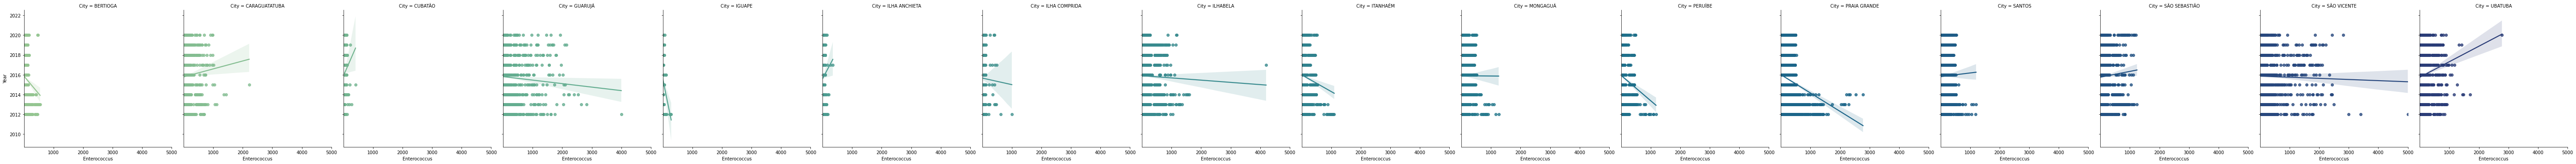

In [ ]:
# Elaboração do lmplot
# Diz respeito a uma regressão
sns.lmplot( x = 'Enterococcus', y = 'Year', data = beachlist, hue = 'City', col = 'City', palette = 'crest')

plt.show()

Após as análises vistas, elaborou-se o **heatmap**, que nos expõe os padrões presentes no repositório.

Foram utilizados dois critérios de análise: o intitulado *Enterococcus* e *Year*, que apresenta os anos da coletas para análise. Diante disso, nota-se que a correlação entre os tópicos já citados é negativo, nos apresentando uma associação negativa, e uma correlação fraca, já que a mesma é menor de 0.000.


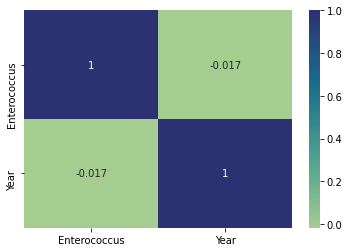

In [ ]:
# Elaboração do dado de correlação (heatmap)
# IMPORTANTE! Os dados correlacionados são numéricos! 
sns.heatmap (beachlist.corr(), annot = True, cmap = 'crest')

plt.show()


Mas, e se pudéssemos relacionar esses dados aos municípios da coleta e as praias? 

Perceberiamos que a correlação entre quatro coeficientes aumentaria, uma vez que existe, conforme visto, que existe uma relação entre os municípios, as praias, e a quantidade de *Enterococcus* encontrado em cada coleta realizada.


### Referências:

Endereço do repositório de dados utilizados: [*Kaggle*](https://www.kaggle.com/amandalk/sp-beaches-water-quality);

Mais informações sobre da biblioteca [*seaboorn*](https://seaborn.pydata.org/index.html#).
